#Settings Google

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
base_dir = '/content/drive/MyDrive/TAabsa'
os.makedirs(base_dir, exist_ok=True)

# Ubah direktori kerja
os.chdir(base_dir)
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/MyDrive/TAabsa


In [1]:
import os


In [2]:
ls

README.md  configs/     data/        preprocess/  train.csv  val.csv
args.json  constant.py  evaluation/  run.ipynb    utils.py


#Configs

##na config

In [ ]:
import json

# Isi data yang diinginkan
data = ["data/pos_tag/id/interim/data_1000.csv"]

# Konversi data ke format JSON
json_data = json.dumps(data)

# Simpan data JSON ke file
json_file_path = "configs/na_config.json"
with open(json_file_path, 'w') as json_file:
    json_file.write(json_data)

print(f"Data telah berhasil disimpan ke {json_file_path}")


Data telah berhasil disimpan ke configs/na_config.json


##td config

In [ ]:
import json

# Isi data yang diinginkan
data = [
    {
        "path": "data/absa/id/william/train.txt",
        "nt_se_order": "aos",
        "tasks": [
            "aos",
            "ao",
            "as",
            "a",
            "o"
        ],
        "n_fold": 5,
        "algo": "round_robin",
        "shuffle": True
    }
]

# Konversi data ke format JSON
json_data = json.dumps(data)

# Simpan data JSON ke file
json_file_path = "configs/td_config.json"
with open(json_file_path, 'w') as json_file:
    json_file.write(json_data)

print(f"Data telah berhasil disimpan ke {json_file_path}")


Data telah berhasil disimpan ke configs/td_config.json


##train args

In [ ]:
data = {
    "num_train_epochs": 1,
    "learning_rate": 3e-4,
    "save_total_limit": 2,
    "gradient_accumulation_steps": 1,
    "per_device_train_batch_size": 8,
    "per_device_eval_batch_size": 8,
    "save_strategy": "epoch",
    "eval_strategy": "epoch",
    "metric_for_best_model": "overall_f1_score",
    "load_best_model_at_end": True,
    "adam_epsilon": 1e-08,
    "output_dir": "./output/GAS-Indo-o",
    "include_inputs_for_metrics" : True
}

# Konversi data ke format JSON
json_data = json.dumps(data)

# Simpan data JSON ke file
json_file_path = "configs/train_args.json"
with open(json_file_path, 'w') as json_file:
    json_file.write(json_data)

print(f"Data telah berhasil disimpan ke {json_file_path}")

Data telah berhasil disimpan ke configs/train_args.json


##vd config

In [ ]:
import json

# Isi data yang diinginkan
data = [
    {
        "path": "data/absa/id/william/dev.txt",
        "nt_se_order": "aos",
        "tasks": [
            "aos",
            "ao",
            "as",
            "a",
            "o"
        ],
        "n_fold": 5,
        "algo": "round_robin",
        "shuffle": True
    }
]

# Konversi data ke format JSON
json_data = json.dumps(data)

# Simpan data JSON ke file
json_file_path = "configs/vd_config.json"
with open(json_file_path, 'w') as json_file:
    json_file.write(json_data)

print(f"Data telah berhasil disimpan ke {json_file_path}")


Data telah berhasil disimpan ke configs/vd_config.json


## pindahin ke drive

In [ ]:
import shutil
import os

# Misalkan direktori sumber berisi file-file yang ingin dipindahkan
files_to_move = [
    '/content/na_config.json',
    '/content/td_config.json',
    '/content/train_args.json',
    '/content/sd_config.json'
]
destination_directory = '/content/drive/My Drive/TAabsa/configs'

# Buat direktori tujuan jika belum ada
os.makedirs(destination_directory, exist_ok=True)

# Memindahkan setiap file ke Google Drive
for file_path in files_to_move:
    destination = destination_directory + file_path.split('/')[-1]
    shutil.move(file_path, destination)
    print(f"{file_path} telah dipindahkan ke {destination}")

#Constant

In [ ]:
# Salin kode ke dalam file utils.py
%%writefile constant.py

SENTTAG2WORD = {"POS": "positive", "NEG": "negative", "NEU": "neutral"}
# SENTIMENT_ELEMENT = {'a' : "aspect", 'o' : "opinion", 's' : "sentiment", 'c' : "category"}
# SENTTAG2WORD = {"POS": "positif", "NEG": "negatif", "NEU": "netral"}
SENTIMENT_ELEMENT = {'a' : "aspek", 'o' : "opini", 's' : "sentimen", 'c' : "kategori"}
SEP = "####"
NO_TARGET = "NULL"
IMPLICIT_ASPECT = "NULL"
GAS_TOKEN = {
    ',' : "<comma>",
    '(' : "<open_bracket>",
    ')' : "<close_bracket>"
}

Overwriting constant.py


#args json

In [ ]:
import json

# Isi data yang diinginkan
data = {
    "seed" : 42,
    "n_gpu" : "2",
    "td_config" : "/content/drive/MyDrive/TAabsa/configs/td_config.json",
    "vd_config" : "/content/drive/MyDrive/TAabsa/configs/vd_config.json",
    "train_args" : "/content/drive/MyDrive/TAabsa/configs/train_args.json",
    "max_len" : 128,
    "model_name_or_path" : "google/mt5-base",
    "prompt" : "no_prompt",
    "answer" : "gas",
    "shuffle_train" : True
}

# Konversi data ke format JSON
json_data = json.dumps(data)

# Simpan data JSON ke file
json_file_path = "/content/drive/MyDrive/TAabsa/args.json"
with open(json_file_path, 'w') as json_file:
    json_file.write(json_data)

print(f"Data telah berhasil disimpan ke {json_file_path}")


Data telah berhasil disimpan ke /content/drive/MyDrive/TAabsa/args.json


#Evaluation metrics

In [ ]:
# Salin kode ke dalam file utils.py
%%writefile evaluation/metrics.py
from typing import List, Dict

"""
The metrics in this research follows the following rule:
1. The definition of true positive is said that an ABSA tuple that exist in the prediction list, also exist in the target list
2. The definition of the false positive is said that an ABSA tuple that exist in the prediction list do not exist in the target list
3. The definition of the false negative is said that an ABSA tuple that exist in the target list do not exist in the prediction list
"""

def lower(preds_or_targets):
    result = str(preds_or_targets)
    result = result.lower()
    return eval(result)

def recall(predictions:List[List[Dict]],targets:List[List[Dict]]) -> float:
    """
    ### DESC
        Recall metric function for ABSA.
    ### PARAMS
    * predictions: List of list of prediction dictionary.
    * targets: List of list of target dictionary.
    ### RETURN
    * Recall value.
    """
    true_positive = 0
    false_negative = 0
    for prediction,target in zip(lower(predictions),lower(targets)):
        for target_tuple in target:
            if target_tuple in prediction:
                true_positive += 1
            else:
                false_negative += 1
    result = true_positive/(true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    return result

def precision(predictions:List[List[Dict]],targets:List[List[Dict]]) -> float:
    """
    ### DESC
        Precision metric function for ABSA.
    ### PARAMS
    * predictions: List of list of prediction dictionary.
    * targets: List of list of target dictionary.
    ### RETURN
    * Precision value.
    """
    true_positive = 0
    false_positive = 0
    for prediction,target in zip(lower(predictions),lower(targets)):
        for prediction_tuple in prediction:
            if prediction_tuple in target:
                true_positive += 1
            else:
                false_positive += 1
    result = true_positive/(true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    return result

def f1_score(predictions:List[List[Dict]],targets:List[List[Dict]]) -> float:
    """
    ### DESC
        F1 score metric function for ABSA.
    ### PARAMS
    * predictions: List of list of prediction dictionary.
    * targets: List of list of target dictionary.
    ### RETURN
    * F1 score value.
    """
    recall_value = recall(predictions,targets)
    precision_value = precision(predictions,targets)
    result = (2 * recall_value * precision_value)/(recall_value + precision_value) if (recall_value + precision_value) > 0 else 0
    return result

def summary_score(predictions:List[List[Dict]],targets:List[List[Dict]]) -> Dict:
    """
    ### DESC
        Score summary (recall, precision, f1 score).
    ### PARAMS
    * predictions: List of list of prediction dictionary.
    * targets: List of list of target dictionary.
    ### RETURN
    * Score summary in a dictionary form.
    """
    return {
        "recall" : recall(predictions,targets),
        "precision" : precision(predictions,targets),
        "f1_score" : f1_score(predictions,targets)
    }

Overwriting evaluation/metrics.py


#Utils

In [ ]:
import evaluation
from evaluation import metrics
from evaluation import metrics


In [ ]:
# Salin kode ke dalam file utils.py
%%writefile utils.py

import random
import numpy as np
import torch
from evaluation import metrics
from typing import List, Dict

def lower(preds_or_targets):
        result = str(preds_or_targets)
        result = result.lower()
        return eval(result)

def summary_score(predictions:List[List[Dict]],targets:List[List[Dict]]) -> Dict:
        return {
            "recall" : recall(predictions,targets),
            "precision" : precision(predictions,targets),
            "f1_score" : f1_score(predictions,targets)
        }

def recall(predictions:List[List[Dict]],targets:List[List[Dict]]) -> float:
        true_positive = 0
        false_negative = 0
        for prediction,target in zip(lower(predictions),lower(targets)):
            for target_tuple in target:
                if target_tuple in prediction:
                    true_positive += 1
                else:
                    false_negative += 1
        result = true_positive/(true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        return result

def precision(predictions:List[List[Dict]],targets:List[List[Dict]]) -> float:
        true_positive = 0
        false_positive = 0
        for prediction,target in zip(lower(predictions),lower(targets)):
            for prediction_tuple in prediction:
                if prediction_tuple in target:
                    true_positive += 1
                else:
                    false_positive += 1
        result = true_positive/(true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        return result

def f1_score(predictions:List[List[Dict]],targets:List[List[Dict]]) -> float:
        recall_value = recall(predictions,targets)
        precision_value = precision(predictions,targets)
        result = (2 * recall_value * precision_value)/(recall_value + precision_value) if (recall_value + precision_value) > 0 else 0
        return result

def set_seed(seed: int):
        random.seed(seed)
        np.random.seed(seed)
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

def add_token_clm(model, tokenizer):
        resize = False
        if tokenizer.pad_token == None:
            pad_token = "<|pad|>"
            tokenizer.add_tokens([pad_token])
            tokenizer.add_special_tokens({"pad_token": pad_token})
            resize = True
        if tokenizer.eos_token == None:
            eos_token = "<|endoftext|>"
            tokenizer.add_tokens([eos_token])
            tokenizer.add_special_tokens({"eos_token": eos_token})
            resize = True
        if tokenizer.sep_token == None:
            sep_token = "<|sep|>"
            tokenizer.add_tokens([sep_token])
            tokenizer.add_special_tokens({"sep_token": sep_token})
            resize = True
        if resize:
          model.resize_token_embeddings(len(tokenizer))

def preprocess_logits_for_metrics(logits, targets):
        pred_logits = logits[0] if isinstance(logits,tuple) else logits
        pred_ids = torch.argmax(pred_logits, dim=-1)
        return pred_ids, targets

def get_task(se_order):
        task = sorted(se_order)
        task = ''.join(se_order)
        return task

def seperate_target_prediction_per_task(predictions, targets, se_order):
        per_task_targets = {}
        per_task_predictions = {}
        for target, prediction, so in zip(targets,predictions,se_order):
            task = get_task(so)
            if task not in per_task_targets.keys():
                per_task_targets[task] = []
            if task not in per_task_predictions.keys():
                per_task_predictions[task] = []
            per_task_targets[task].append(target)
            per_task_predictions[task].append(prediction)
        return per_task_targets, per_task_predictions

def preprocess_eval_preds(eval_preds, decoding_args ,tokenizer):
        input_ids = eval_preds.inputs
        target_ids = eval_preds.label_ids
        pred_ids = eval_preds.predictions

        # In case the model returns more than the prediction logits
        if isinstance(input_ids, tuple):
            input_ids = input_ids[0]
        if isinstance(target_ids, tuple):
            target_ids = target_ids[0]
        if isinstance(pred_ids, tuple):
            pred_ids = pred_ids[0]

        input_ids = np.argmax(input_ids,axis=-1) if len(input_ids.shape) == 3 else input_ids # in case not predict with generate
        target_ids = np.argmax(target_ids,axis=-1) if len(target_ids.shape) == 3 else target_ids # in case not predict with generate
        prediction_ids = np.argmax(pred_ids,axis=-1) if len(pred_ids.shape) == 3 else pred_ids # in case not predict with generate

        input_ids = [[token for token in row if token != -100] for row in input_ids]
        target_ids = [[token for token in row if token != -100] for row in target_ids]
        prediction_ids = [[token for token in row if token != -100] for row in prediction_ids]

        inputs = tokenizer.batch_decode(input_ids,**decoding_args)
        targets = tokenizer.batch_decode(target_ids,**decoding_args)
        predictions = tokenizer.batch_decode(prediction_ids,**decoding_args)

        return inputs, targets, predictions

def compute_metrics(catch_answer, eval_preds, decoding_args, tokenizer, se_order):
        inputs, targets, predictions = preprocess_eval_preds(eval_preds,decoding_args,tokenizer)

        print("INPUTS >>",inputs[0])
        print("TARGETS >>",targets[0])
        print("PREDS >>",predictions[0])

        targets = [catch_answer(out,task,inputs) for out,task,inputs in zip(targets,se_order,inputs) if task != "non_absa"]
        predictions = [catch_answer(out,task,inputs) for out,task,inputs in zip(predictions,se_order,inputs) if task != "non_absa"]

        per_task_targets, per_task_predictions = seperate_target_prediction_per_task(predictions, targets, se_order)

        metrics = {}

        metrics["overall_recall"] = recall(predictions,targets)
        metrics["overall_precision"] = precision(predictions,targets)
        metrics["overall_f1_score"] = f1_score(predictions,targets)

        for task in per_task_targets.keys():
            if task == "non_absa":
                continue
            metrics[f"{task}_recall"] = recall(per_task_predictions[task],per_task_targets[task])
            metrics[f"{task}_precision"] = precision(per_task_predictions[task],per_task_targets[task])
            metrics[f"{task}_f1_score"] = f1_score(per_task_predictions[task],per_task_targets[task])

        return metrics

Overwriting utils.py


In [ ]:
# Membuat folder dengan nama 'preprocess'
!mkdir preprocess

#Preprocessing

##Num targets

In [ ]:
# Salin kode ke dalam file num_targets.py
%%writefile preprocess/num_targets.py

import sys
sys.path.append("..")
import constant
from typing import Dict, List, Tuple

def process_num_targets(text:str, num_targets:List[Tuple], se_order:str) -> List[Dict]:
    """
    ### DESC
        Method for processing num targets to target in the format list of dictionaries.
    ### PARAMS
    * text: Text source.
    * num_targets: Targets in the form list of tuples, may consist of aspect term or opinion term indexes.
    * se_order: Sentiment element order, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
    ### RETURN
    * The resultant targets in the form list of dictionaries.
    """
    splitted_text = text.split()
    result_targets = []
    for num_target in num_targets:
        assert len(num_target) == len(se_order) # number of element in the num targets must be the same with the task
        target = {}
        for i, se in enumerate(se_order): # iterate a, c, o, s
            assert se in constant.SENTIMENT_ELEMENT
            key = constant.SENTIMENT_ELEMENT[se]
            if se == 'a' or se == 'o':
                if num_target[i] != [-1]: # Implicit aspect
                    value = ' '.join([splitted_text[j] for j in num_target[i]])
                else:
                    value = constant.IMPLICIT_ASPECT
            elif se == 's':
                value = constant.SENTTAG2WORD[num_target[i]]
            else: # se == 'c
                value = num_target[i]
            target[key] = value
        result_targets.append(target)
    return result_targets

def reduce_num_targets(num_targets:List[Tuple], src_se_order:str="aos", tgt_se_order:str="ao") -> List[Tuple]:
    """
    ### DESC
        Reduce num_target to fewer sentiment elements.
    ### PARAMS
    * num_targets: List of num_target.
    * src_se_order: Sentiment element order from the source num_targets, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
    * tgt_se_order: Sentiment element order for the target num_targets, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
    ### RETURN
    * Reduced num_targets.
    """
    assert set(src_se_order).issubset(constant.SENTIMENT_ELEMENT)
    assert set(tgt_se_order).issubset(src_se_order)
    if len(num_targets) > 0:
        assert len(src_se_order) == len(num_targets[0])

    tgt_index = []
    for se in tgt_se_order:
        index = src_se_order.index(se)
        tgt_index.append(index)

    result = []
    for nt in num_targets:
        reduced_nt = []
        for index in tgt_index:
            reduced_nt.append(nt[index])
        reduced_nt = tuple(reduced_nt)
        if reduced_nt not in result:
            result.append(reduced_nt)

    return result

Overwriting preprocess/num_targets.py


##ans constructor

In [ ]:
%%writefile preprocess/ans_constructor.py
import sys
sys.path.append("..")
import constant
from typing import Tuple
from num_targets import process_num_targets, reduce_num_targets

class AnswerConstructor:
    """
    Responsible to construct answer in to the decomposed form.
    """
    def lego_absa(self, text:str, num_targets:Tuple, nt_se_order:str="aos", se_order:str="aos") -> str:
        """
        ### DESC
            LEGO-ABSA answer.
        ### PARAMS
        * text: Text.
        * num_targets: Number targets. Example for aocs: [([1],[2],"restaurant_general","positive")].
        * nt_se_order: Sentiment order in the num_targets' tuples, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        * se_order: Sentiment element order for the decomposed answer, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        ### RETURN
        * Decomposed answer.
        """
        reduced_nt = reduce_num_targets(num_targets=num_targets,
                                        src_se_order=nt_se_order,
                                        tgt_se_order=se_order)
        targets = process_num_targets(text=text,
                                      num_targets=reduced_nt,
                                      se_order=se_order)

        if len(targets) == 0:
            return constant.NO_TARGET

        result = []
        counter = 0
        for t in targets:
            constructed_t = ""
            for se in se_order:
                counter = counter % 100 # maximum index of special token in T5 is 99
                constructed_t += ' ' + f"<extra_id_{counter}>" + ' ' + t[constant.SENTIMENT_ELEMENT[se]]
                counter += 1
            constructed_t = constructed_t.strip()
            result.append(constructed_t)
        result = " ; ".join(result)
        return result

    def gas(self, text:str, num_targets:Tuple, nt_se_order:str="aos", se_order:str="aos") -> str:
        """
        ### DESC
            GAS answer.
        ### PARAMS
        * text: Text.
        * num_targets: Number targets. Example for aocs: [([1],[2],"restaurant_general","positive")].
        * nt_se_order: Sentiment order in the num_targets' tuples, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        * se_order: Sentiment element order for the decomposed answer, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        ### RETURN
        * Decomposed answer.
        """
        reduced_nt = reduce_num_targets(num_targets=num_targets,
                                        src_se_order=nt_se_order,
                                        tgt_se_order=se_order)
        targets = process_num_targets(text=text,
                                      num_targets=reduced_nt,
                                      se_order=se_order)

        if len(targets) == 0:
            return constant.NO_TARGET

        result = []
        for t in targets:
            constructed_t = []
            for se in se_order:
                element = t[constant.SENTIMENT_ELEMENT[se]]

                constructed_t.append(element)
            constructed_t = " , ".join(constructed_t)
            constructed_t = f"( {constructed_t} )"
            result.append(constructed_t)
        result = " ; ".join(result)
        return result

    def bartabsa(self, text:str, num_targets:Tuple, nt_se_order:str="aos", se_order:str="aos") -> str:
        """
        ### DESC
            BARTABSA answer.
        ### PARAMS
        * text: Text.
        * num_targets: Number targets. Example for aocs: [([1],[2],"restaurant_general","positive")].
        * nt_se_order: Sentiment order in the num_targets' tuples, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        * se_order: Sentiment element order for the decomposed answer, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        ### RETURN
        * Decomposed answer.
        """
        reduced_nt = reduce_num_targets(num_targets=num_targets,
                                        src_se_order=nt_se_order,
                                        tgt_se_order=se_order)

        if len(reduced_nt) == 0:
            return "-1"

        result = []

        tgt_index = []
        for se in se_order:
            index = nt_se_order.index(se)
            tgt_index.append(index)

        for nt in reduced_nt:
            for ti in tgt_index:
                el = nt[ti]
                if isinstance(el,list):
                    result.append(str(el[0])) # start index
                    result.append(str(el[-1])) # end index
                else:
                    result.append(el)
        return ','.join(result)

Writing preprocess/ans_constructor.py


##Read

In [ ]:
%%writefile preprocess/read.py
import sys
sys.path.append("..")
import constant
from typing import Dict, List

class DataReader:
    """
    Responsible to read txt files containing ABSA dataset.
    """
    def do(self, path:str) -> List[Dict]:
        """
        ### DESC
            Method to read dataset. Each line is in the format of TEXT####TARGETS .
        ### PARAMS
        * path: Data path.
        ### RETURN
        * Dataset containing "text" and "num_targets" key.
        """
        assert path.endswith(".txt")
        with open(path, 'r') as reader:
            data = reader.read().strip().splitlines()
        for i,line in enumerate(data):
            try:
                text, num_targets = line.split(constant.SEP)
            except Exception as e:
                raise ValueError(f"Each line should be in the format 'TEXT{constant.SEP}TARGET'. Yours: {line}")
            num_targets = eval(num_targets)
            data[i] = {"text" : text, "num_targets" : num_targets}
        return data

    def __call__(self, path:str) -> List[Dict]:
        """
        ### DESC
            Read dataset. Each line is in the format of TEXT####TARGETS .
        ### PARAMS
        * path: Data path.
        ### RETURN
        * Dataset containing "text" and "num_targets" key.
        """
        return self.do(path=path)

Overwriting preprocess/read.py


##Prompter

In [ ]:
%%writefile preprocess/prompter.py
import sys
sys.path.append("..")
import constant

class Prompter:
    """
    Responsible to add prompt to a text.
    """
    def lego_absa(self, text:str, se_order:str="aos") -> str:
        """
        ### DESC
            LEGO-ABSA prompt.
        ### PARAMS
        * text: Text.
        * se_order: Sentiment element order, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        ### RETURN
        * Prompted text.
        """
        prompt = []
        for counter, se in enumerate(se_order):
            prompt.append(constant.SENTIMENT_ELEMENT[se] + " : " + f"<extra_id_{counter}>")
        prompt = " ,".join(prompt)
        result = text + "| " + prompt
        return result

    def gas(self, text:str, se_order:str="aos") -> str:
        """
        ### DESC
            GAS prompt.
        ### PARAMS
        * text: Text.
        * se_order: Sentiment element order, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        ### RETURN
        * Prompted text.
        """
        prompt = []
        for se in se_order:
            prompt.append(constant.SENTIMENT_ELEMENT[se])
        prompt = " , ".join(prompt)
        prompt = f"( {prompt} )"
        masked_text = text
        result = masked_text + "| " + prompt
        return result

    def bartabsa(self, text:str, se_order:str="aos") -> str:
        """
        ### DESC
            BARTABSA prompt.
        ### PARAMS
        * text: Text.
        * se_order: Sentiment element order, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        ### RETURN
        * Prompted text.
        """
        prompt = []
        for se in se_order:
            if se == 'o' or se == 'a':
                name = constant.SENTIMENT_ELEMENT[se]
                start_index = name + "_start"
                end_index = name + "_end"
                prompt.append(start_index)
                prompt.append(end_index)
            else:
                prompt.append(constant.SENTIMENT_ELEMENT[se])
        prompt = ",".join(prompt)
        result = text + "| " + prompt
        return result

    def prefix(self, text:str, se_order:str="aos") -> str:
        """
        ### DESC
            Prefix prompt.
        ### PARAMS
        * text: Text.
        * se_order: Sentiment element order, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        ### RETURN
        * Prompted text.
        """
        prompt = []
        for counter, se in enumerate(se_order):
            prompt.append(constant.SENTIMENT_ELEMENT[se] + " : " + f"<extra_id_{counter}>")
        prompt = " ,".join(prompt)
        result = f"Ekstrak ABSA dengan format >> {prompt} | " + text
        return result

    def one_token(self, text:str, se_order:str="aos") -> str:
        """
        ### DESC
            One token prompt.
        ### PARAMS
        * text: Text.
        * se_order: Sentiment element order, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        ### RETURN
        * Prompted text.
        """
        result = f"<{se_order}> : " + text
        return result

    def no_prompt(self, text:str, se_order:str="aos") -> str:
        """
        ### DESC
            No prompt.
        ### PARAMS
        * text: Text.
        * se_order: Sentiment element order, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        ### RETURN
        * Prompted text.
        """
        return text

Writing preprocess/prompter.py


##Augmentation

In [ ]:
%%writefile preprocess/augmentation.py
import random
from copy import deepcopy
from tqdm import tqdm
from typing import List, Dict
from .prompter import Prompter
from .ans_constructor import AnswerConstructor

available_algo = ["random", "round_robin"]

class DataAugmentator:
    """
    Responsible to conduct data augmentation.
    """
    def __init__(self):
        self.prompter = Prompter()
        self.ans_constructor = AnswerConstructor()

    def do(self, data:List[Dict], nt_se_order:str, tasks:List[Dict], n_fold:int=1, algo:str="round_robin", shuffle=True) -> List[Dict]:
        """
        ### DESC
            Method to conduct data augmentation.
        ### PARAMS
        * data: Data created from DataReader instance.
        * nt_se_order: Sentiment order in the num_targets' tuples, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        * tasks: List of dictionary containing the task details. See "task_example" method to know the tasks example.
        * n_fold: The amount of dataset that is multiplied.
        * algo: Task sampling algorithm.
        * shuffle: If shuffle is true, then the data will be shuffled using random library.
        ### RETURN
        * List of dictionary containing augmented dataset.
        """
        result = []
        pbar = tqdm(total=n_fold*len(data))

        for i in range(len(data)):
            for n in range(n_fold):
                row = data[i]
                chosen_task = None
                if algo == "round_robin":
                    chosen_task = deepcopy(tasks[((i * n_fold) + n)%len(tasks)])
                elif algo == "random":
                    chosen_task = deepcopy(random.choice(tasks))
                else:
                    raise NotImplementedError(f"Available task sampling algorithm: {available_algo}")

                prompt_method = chosen_task.pop("prompt")
                answer_method = chosen_task.pop("answer")

                # prompter
                prompt_func = getattr(self.prompter, prompt_method)
                # answer
                ans_func = getattr(self.ans_constructor, answer_method)

                prompt_args = deepcopy(chosen_task)
                prompt_args["text"] = row["text"]

                # input
                inputs = prompt_func(**prompt_args)
                # output
                out = ans_func(text=row["text"],
                            num_targets=row["num_targets"],
                            nt_se_order=nt_se_order,
                            se_order=chosen_task["se_order"])
                result_row = {
                    "input" : inputs,
                    "output" : out,
                    "se_order" : chosen_task["se_order"]
                }
                if result_row not in result:
                    result.append(result_row)
                pbar.update(1)

        if shuffle:
            random.shuffle(result)
        return result

    def __call__(self, data:List[Dict], nt_se_order:str, tasks:List[Dict], n_fold:int, algo:str, shuffle=True) -> List[Dict]:
        """
        ### DESC
            Conduct data augmentation.
        ### PARAMS
        * data: Data created from DataReader instance.
        * nt_se_order: Sentiment order in the num_targets' tuples, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        * tasks: List of dictionary containing the task details. See "task_example" method to know the tasks example.
        * n_fold: The amount of dataset that is multiplied.
        * algo: Task sampling algorithm.
        * shuffle: If shuffle is true, then the data will be shuffled using random library.
        ### RETURN
        * List of dictionary containing augmented dataset.
        """
        return self.do(data=data,
                       nt_se_order=nt_se_order,
                       tasks=tasks,
                       n_fold=n_fold,
                       algo=algo,
                       shuffle=shuffle)

    def task_example(self) -> List[Dict]:
        """
        Example of tasks value in the "do" or call method.
        """
        return [
            {
                "se_order" : "aos",
                "prompt" : "lego_absa",
                "answer" : "lego_absa"
            },
            {
                "se_order" : "ao",
                "prompt" : "lego_absa",
                "answer" : "lego_absa"
            },
            {
                "se_order" : "as",
                "prompt" : "lego_absa",
                "answer" : "lego_absa"
            },
            {
                "se_order" : 'a',
                "prompt" : "lego_absa",
                "answer" : "lego_absa"
            },
            {
                "se_order" : 'o',
                "prompt" : "lego_absa",
                "answer" : "lego_absa"
            }
        ]

Overwriting preprocess/augmentation.py


#PostProcess

In [3]:
mkdir postprocess

##ans catcher

In [4]:
%%writefile postprocess/ans_catcher.py
import re
import sys
sys.path.append("..")
import constant
from typing import List, Dict

class AnswerCatcher:
    """
    Responsible to catch the decomposed answer and transform it to list of dictionary.
    """
    def lego_absa(self, out:str, se_order:str, text:str) -> List[Dict]:
        """
        ### DESC
            Transform LEGO-ABSA decomposed answer.
        ### PARAMS
        * out: Decomposed answer.
        * se_order: Sentiment element order, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        * text: Input text.
        ### RETURN
        * Answer.
        """
        if out == constant.NO_TARGET:
            return []
        pattern = r""
        for se in se_order:
            if se != 's':
                pattern += f"<extra_id_\d+>\s*(?P<{constant.SENTIMENT_ELEMENT[se]}>[^;]+)\s*"
            else:
                # pattern += f"<extra_id_\d+>\s*(?P<{constant.SENTIMENT_ELEMENT['s']}>positive|negative|neutral)\s*"
                pattern += f"<extra_id_\d+>\s*(?P<{constant.SENTIMENT_ELEMENT['s']}>{'|'.join(constant.SENTTAG2WORD.values())})\s*"
        result = [found_iter.groupdict() for found_iter in re.finditer(pattern,out)]
        for i in range(len(result)):
            for k, v in result[i].items():
                result[i][k] = v.strip()
        return result

    def gas(self, out:str, se_order:str, text:str) -> List[Dict]:
        """
        ### DESC
            Transform GAS decomposed answer.
        ### PARAMS
        * out: Decomposed answer.
        * se_order: Sentiment element order, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        * text: Input text.
        ### RETURN
        * Answer.
        """
        if out == constant.NO_TARGET:
            return []
        pattern = []
        for se in se_order:
            if se != 's':
                pattern.append(f"\s*(?P<{constant.SENTIMENT_ELEMENT[se]}>[^;]+)\s*")
            else:
                # pattern.append(f"\s*(?P<{constant.SENTIMENT_ELEMENT['s']}>positive|negative|neutral)\s*")
                pattern.append(f"\s*(?P<{constant.SENTIMENT_ELEMENT['s']}>{'|'.join(constant.SENTTAG2WORD.values())})\s*")
        pattern = ','.join(pattern)
        pattern = f"\({pattern}\)"
        result = [found_iter.groupdict() for found_iter in re.finditer(pattern,out)]
        for i in range(len(result)):
            for k, v in result[i].items():
                # unmask
                for k2, v2 in constant.GAS_TOKEN.items():
                    v = v.replace(v2,k2)
                result[i][k] = v.strip()
        return result

    def bartabsa(self, out:str, se_order:str, text:str) -> List[Dict]:
        """
        ### DESC
            Transform BARTABSA decomposed answer.
        ### PARAMS
        * out: Decomposed answer.
        * se_order: Sentiment element order, denoted by a (aspect), c (category), o (opinion), and s (sentiment).
        * text: Input text.
        ### RETURN
        * Answer.
        """
        splitted_text = text.split()
        if out == "-1":
            return []
        result = []
        splitted_output = out.split(',')
        splitted_output = [el.strip() for el in splitted_output]

        chunk_size = 0
        for se in se_order:
            if se == 'o' or se == 'a':
                chunk_size += 2
            else:
                chunk_size += 1

        chunks = [
            splitted_output[i:i+chunk_size] for i in range(0,len(splitted_output),chunk_size)
        ]

        chunks = [el for el in chunks if len(el) == chunk_size]

        for el in chunks:
            pred = {}
            cnt_index = 0
            is_invalid = False
            for se in se_order:
                if se == 'a' or se == 'o':
                    start_index = el[cnt_index]
                    end_index = el[cnt_index+1]
                    cnt_index += 2

                    try:
                        start_index = int(start_index)
                        end_index = int(end_index)
                        if end_index < start_index:
                            start_index, end_index = end_index, start_index
                        if start_index == -1 or end_index == -1:
                            pred[constant.SENTIMENT_ELEMENT[se]] = constant.IMPLICIT_ASPECT
                        else:
                            word = splitted_text[start_index:end_index+1]
                            word = ' '.join(word)
                            pred[constant.SENTIMENT_ELEMENT[se]] = word
                    except:
                        is_invalid = True
                        break
                elif se == 's':
                    try:
                        sentiment = constant.SENTTAG2WORD[el[cnt_index]]
                        pred[constant.SENTIMENT_ELEMENT['s']] = sentiment
                    except:
                        is_invalid = True
                        pass
                    cnt_index += 1
                else: # c
                    pred[constant.SENTIMENT_ELEMENT[se]] = el[cnt_index]
                    cnt_index += 1
            if not is_invalid:
                result.append(pred)
        return result

Writing postprocess/ans_catcher.py


##Clean

In [5]:
%%writefile postprocess/clean.py
from typing import List
class Cleaner:
    """
    Responsible to clean the output from the generative ABSA model.
    """
    def one(self, out:str, remove:List[str]=["</s>","<pad>"]) -> str:
        """
        ### DESC
            Method to clean one instance of decomposed answer.
        ### PARAMS
        * out: Decomposed answer.
        * remove: Phrase/word/token that needs to be removed.
        ### RETURN
        * Clean answer.
        """
        result = out
        for tok in remove:
            result = result.replace(tok, '')
        result = result.strip()
        return result

    def many(self, outputs:List[str], remove:List[str]=["</s>","<pad>"]) -> List[str]:
        """
        ### DESC
            Method to clean many instance of decomposed answer.
        ### PARAMS
        * outputs: List of decomposed answer.
        * remove: Phrase/word/token that needs to be removed.
        ### RETURN
        * List of clean answer.
        """
        return [self.one(out=out, remove=remove) for out in outputs]

Writing postprocess/clean.py


## clean

#Run

In [8]:
ls


README.md  configs/     data/        postprocess/  run.ipynb  utils.py
args.json  constant.py  evaluation/  preprocess/   train.csv  val.csv


In [1]:
# %%writefile evaluation/__init__.py
from evaluation.metrics import *

In [2]:
# %%writefile postprocess/__init__.py
from postprocess.ans_catcher import AnswerCatcher
from postprocess.clean import Cleaner

In [3]:
# %%writefile preprocess/__init__.py
from preprocess.read import DataReader
import preprocess.num_targets
from preprocess.augmentation import DataAugmentator

In [4]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install transformers[torch]

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade transformers

Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install transformers[torch] accelerate -U

In [8]:
from evaluation import metrics

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install matplotlib

In [ ]:
eval_results = trainer.evaluate()
    performances.append(eval_results['eval_loss'])

# Plot hasil
plt.plot(dataset_sizes, performances, marker='o')
plt.xlabel('Ukuran Dataset')
plt.ylabel('Loss Evaluasi')
plt.title('Dampak Ukuran Dataset terhadap Performa Model mT5')
plt.grid(True)
plt.show()

#try this one!

In [22]:
import optuna
import torch
from transformers import MT5ForConditionalGeneration, MT5Tokenizer, DataCollatorForSeq2Seq, Trainer, TrainingArguments
from datasets import load_dataset, load_metric
import matplotlib.pyplot as plt
import pandas as pd
from argparse import ArgumentParser
import os
from datasets import Dataset
import utils
import preprocess
import postprocess
import pandas as pd
import json
import random
from copy import deepcopy
from transformers import (Trainer, TrainingArguments,
                          Seq2SeqTrainer ,Seq2SeqTrainingArguments,
                          DataCollatorForLanguageModeling, DataCollatorForSeq2Seq,
                          AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM)

data_reader = preprocess.read.DataReader()
data_augmentator = preprocess.augmentation.DataAugmentator()
cleaner = postprocess.clean.Cleaner()
answer_catcher = postprocess.ans_catcher.AnswerCatcher()

def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config_indo.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config2.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    # parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="rdyzakya/IndoLEGO-ABSA")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

def set_env(args):
    # Environment
    utils.set_seed(args.seed)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.n_gpu

def get_data(absa_config, non_absa_config, prompt, answer, shuffle):
    ds = []
    for config in absa_config:
        path = config.pop("path")
        data = data_reader.do(path)

        augmentation_args = deepcopy(config)
        for i in range(len(augmentation_args["tasks"])):
            augmentation_args["tasks"][i] = {
                "se_order" : augmentation_args["tasks"][i],
                "prompt" : prompt,
                "answer" : answer
            }
        augmentation_args.update({
            "data" : data
        })

        augmented_data = data_augmentator.do(**augmentation_args)
        ds.extend(augmented_data)

    if non_absa_config != None:
        for path in non_absa_config:
            df = pd.read_csv(path)
            df["se_order"] = "non_absa"
            data = df.to_dict(orient="records")
            ds.extend(data)

    if shuffle:
        random.shuffle(ds)

    ds = Dataset.from_list(ds)

    return ds

def main():
    args = init_args()

    # Set environment
    set_env(args)

    # Training data
    ## ABSA Dataset
    with open(args.td_config, 'r') as fp:
        td_config = json.load(fp)
        # print(td_config)
    ## Non ABSA Dataset
    na_config = None
    if args.na_config != None:
        with open(args.na_config, 'r') as fp:
            na_config = json.load(fp)
    # print(na_config)

    train = get_data(td_config, na_config,
                     prompt=args.prompt, answer=args.answer,
                     shuffle=args.shuffle_train)
    train.to_csv("train.csv")
    # print(train)
    # Validation data
    do_eval = bool(args.vd_config)
    val = None
    if do_eval:
        with open(args.vd_config, 'r') as fp:
            vd_config = json.load(fp)
        val = get_data(vd_config, None,
                       prompt=args.prompt, answer=args.answer,
                       shuffle=False)
        val.to_csv("val.csv")

    tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)
    encode_seq2seq = lambda x: tokenizer(x["input"], text_target=x["output"],
                                    max_length=args.max_len, padding=True, truncation=True,
                                    return_tensors="pt")
    encode_clm = lambda x: tokenizer([el["input"] + ' ' + tokenizer.sep_token + ' ' + el["output"] + ' ' + tokenizer.eos_token
                                      for el in x],
                                    max_length=args.max_len, padding=True, truncation=True,
                                    return_tensors="pt")

    catch_answer_fn = getattr(answer_catcher, args.answer)

    def catch_answer_seq2seq(out, se_order, text):
        out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
        return catch_answer_fn(out, se_order, text)

    def catch_answer_clm(out, se_order, text):
        out = out.split(tokenizer.sep_token)[-1]
        out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
        return catch_answer_fn(out, se_order, text)
    
    model = AutoModelForSeq2SeqLM.from_pretrained(args.model_name_or_path)
    
    train_tok = train.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
    val_tok = val.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
    data_collator = DataCollatorForSeq2Seq(tokenizer)

    def objective(trial):
        # Hyperparameter yang akan dicari
        learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 5e-4)
        num_train_epochs = trial.suggest_int('num_train_epochs', 1, 2)
        per_device_train_batch_size = trial.suggest_categorical('per_device_train_batch_size', [8, 16, 32])
    
        training_argss = TrainingArguments(
            logging_dir='./logs',
            logging_steps=10, 
            eval_strategy="epoch",
            save_strategy="epoch",
            learning_rate=learning_rate,
            per_device_train_batch_size=per_device_train_batch_size,
            per_device_eval_batch_size=per_device_train_batch_size,
            num_train_epochs=num_train_epochs,
            gradient_accumulation_steps=1,
            metric_for_best_model= "overall_f1_score",
            # load_best_model_at_end= true,
            adam_epsilon= 1e-08,
            weight_decay=0.01,
            save_total_limit=2,
            output_dir= "./output/GAS-Indo-o",
            include_inputs_for_metrics= True,
            report_to="none",  # Disable reporting to avoid too much output
        )
        decoding_args = {
            "skip_special_tokens" : False
        }
        trainer = Trainer(
            model=model,
            args=training_argss,
            train_dataset=train_tok,
            eval_dataset=val_tok,
            tokenizer=tokenizer,
            data_collator=data_collator,
            compute_metrics=lambda x: utils.compute_metrics(catch_answer_seq2seq, x, decoding_args, tokenizer, val["se_order"]),
            preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics
        )
    
        trainer.train()
        eval_results = trainer.evaluate()
        # return eval_results['f1_score']
        return eval_results['eval_loss']
        trainer.save_model()
        # Visualisasi proses training
        log_history = trainer.state.log_history
        df = pd.DataFrame(log_history)
        
        # Plot training loss
        plt.figure(figsize=(10, 5))
        plt.plot(df['step'], df['loss'], label='Training Loss')
        plt.xlabel('Step')
        plt.ylabel('Loss')
        plt.title('Training Loss over Steps')
        plt.legend()
        plt.grid(True)
        plt.show()

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1)

    # Tampilkan hasil terbaik
    print("Best trial:")
    trial = study.best_trial
    
    print(f"  Value: {trial.value}")
    print("  Params: ")
    for key, value in trial.params.items():
        print(f"    {key}: {value}")

    # Training akhir dengan hyperparameter terbaik
    best_params = trial.params
    training_argss = TrainingArguments(
        output_dir="./hasil_fix",
        eval_strategy="epoch",
        save_strategy="epoch",
        learning_rate=best_params['learning_rate'],
        per_device_train_batch_size=best_params['per_device_train_batch_size'],
        per_device_eval_batch_size=best_params['per_device_train_batch_size'],
        num_train_epochs=best_params['num_train_epochs'],
        weight_decay=0.01,
        save_total_limit=2,
        logging_dir='./logs',
        logging_steps=10,
        load_best_model_at_end= True,
    )
    decoding_args = {
            "skip_special_tokens" : False
        }
    train_tok = train.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
    val_tok = val.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
    data_collator = DataCollatorForSeq2Seq(tokenizer)
    trainer = Trainer(
        model=model,
        args=training_argss,
        train_dataset=train_tok,
        eval_dataset=val_tok,
        tokenizer=tokenizer,
        data_collator=data_collator,
        compute_metrics=lambda x: utils.compute_metrics(catch_answer_seq2seq, x, decoding_args, tokenizer, val["se_order"]),
        preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics
    )
    
    trainer.train()

    # Save
    if trainer.is_world_process_zero():
        tokenizer.save_pretrained(save_directory=output_dir)
        model.save_pretrained(save_directory=output_dir)
    
    trainer.save_model()
    # Visualisasi proses training
    log_history = trainer.state.log_history
    df = pd.DataFrame(log_history)
    
    # Plot training loss
    plt.figure(figsize=(10, 5))
    plt.plot(df['step'], df['loss'], label='Training Loss')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Training Loss over Steps')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


# NEw

100%|██████████| 2070/2070 [00:00<00:00, 13211.91it/s]


Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

100%|██████████| 520/520 [00:00<00:00, 30737.03it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Map:   0%|          | 0/2003 [00:00<?, ? examples/s]

Map:   0%|          | 0/518 [00:00<?, ? examples/s]

[I 2024-06-25 14:49:48,375] A new study created in memory with name: no-name-022e50be-2b5c-45ac-9bca-956d117a854a
/tmp/ipykernel_1232/443059798.py:148: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 5e-4)
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


INPUTS >> alhamdulillah semuanya sudah baik.| aspek : <extra_id_0></s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
TARGETS >> <extra_id_0> NULL</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
PREDS >> <extra_id_0> semuanya</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><p

[I 2024-06-25 14:51:38,906] Trial 0 finished with value: 0.08746662735939026 and parameters: {'learning_rate': 0.00019032803905736677, 'num_train_epochs': 2, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 0.08746662735939026.


INPUTS >> alhamdulillah semuanya sudah baik.| aspek : <extra_id_0></s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
TARGETS >> <extra_id_0> NULL</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
PREDS >> <extra_id_0> semuanya</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><p

In [58]:
ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


01/        __pycache__/  constant.py  output/       run.ipynb  val.csv
02/        args.json     data/        postprocess/  train.csv
README.md  configs/      evaluation/  preprocess/   utils.py


In [17]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

# Path ke file dataset utama
file_path = Path("data/absa/id/uper/dev_uper.txt")

# Inisialisasi list untuk menyimpan data
data = []

# Buka file dan baca baris per baris
with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()  # Menghapus whitespace ekstra
        if line:  # Memastikan baris tidak kosong
            parts = line.split("\t")  # Memisahkan kolom berdasarkan tab (\t)
            data.append(parts)  # Menambahkan ke list data

# Membuat DataFrame dari list data
df = pd.DataFrame(data, columns=["text"])

# Memisahkan dataset menjadi eval dan test
eval_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Menampilkan informasi ukuran dataset
print(f"Jumlah data eval: {len(eval_df)}")
print(f"Jumlah data test: {len(test_df)}")

# Menyimpan DataFrame ke dalam file TXT
eval_df.to_csv("data/absa/id/uper/eval.txt", index=False, header=None, sep="\t")
test_df.to_csv("data/absa/id/uper/test.txt", index=False, header=None, sep="\t")

# Menampilkan 5 data pertama dari masing-masing dataset
print("\nData Eval:")
print(eval_df.head())

print("\nData Test:")
print(test_df.head())


Jumlah data eval: 83
Jumlah data test: 21

Data Eval:
                                                 text
55  adakan kunjungan industri lagi .####[([1, 2], ...
22  baik namun terlalu banyak presentasi .####[([-...
76           baik sekali .####[([-1], [0, 1], 'POS')]
44  asik banget belajar sama ibu netta .####[([2],...
72  baik , materi bisa dipahami .####[([-1], [0], ...

Data Test:
                                                 text
30  baik , bagus mengajarnya , tepat waktu .####[(...
65  bagus , dan dapat di pahami materinya .####[([...
64  bagus bu sangat menyenangkan .####[([-1], [0],...
53  aku suka cara ngajarnya .####[([2, 3], [1], 'P...
45     baik dan tegas .####[([-1], [0, 1, 2], 'POS')]


In [31]:
from argparse import ArgumentParser
import os
from datasets import Dataset
import utils
import preprocess
import postprocess
import pandas as pd
import json
import random
import torch
from copy import deepcopy
from transformers import (Trainer, TrainingArguments,
                          Seq2SeqTrainer ,Seq2SeqTrainingArguments,
                          DataCollatorForLanguageModeling, DataCollatorForSeq2Seq,
                          AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM)


data_reader = preprocess.read.DataReader()
data_augmentator = preprocess.augmentation.DataAugmentator()
cleaner = postprocess.clean.Cleaner()
answer_catcher = postprocess.ans_catcher.AnswerCatcher()

def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config_indo.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config2.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args.json")
    parser.add_argument("--test_config", type=str, help="Path to test data configuration json file.", default="configs/test_config.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="rdyzakya/IndoLEGO-ABSA")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

def set_env(args):
    # Environment
    utils.set_seed(args.seed)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.n_gpu

def get_data(absa_config, non_absa_config, prompt, answer, shuffle):
    ds = []
    for config in absa_config:
        path = config.pop("path")
        data = data_reader.do(path)

        augmentation_args = deepcopy(config)
        for i in range(len(augmentation_args["tasks"])):
            augmentation_args["tasks"][i] = {
                "se_order" : augmentation_args["tasks"][i],
                "prompt" : prompt,
                "answer" : answer
            }
        augmentation_args.update({
            "data" : data
        })

        augmented_data = data_augmentator.do(**augmentation_args)
        ds.extend(augmented_data)

    if non_absa_config != None:
        for path in non_absa_config:
            df = pd.read_csv(path)
            df["se_order"] = "non_absa"
            data = df.to_dict(orient="records")
            ds.extend(data)

    if shuffle:
        random.shuffle(ds)

    ds = Dataset.from_list(ds)

    return ds

args = init_args()

# Set environment
set_env(args)

# Training data
## ABSA Dataset
with open(args.td_config, 'r') as fp:
    td_config = json.load(fp)

## Non ABSA Dataset
na_config = None
if args.na_config:
    with open(args.na_config, 'r') as fp:
        na_config = json.load(fp)

train = get_data(td_config, na_config,
                 prompt=args.prompt, answer=args.answer,
                 shuffle=args.shuffle_train)
train.to_csv("01/train.csv")

# Validation data
do_eval = bool(args.vd_config)
val = None
if do_eval:
    with open(args.vd_config, 'r') as fp:
        vd_config = json.load(fp)
    val = get_data(vd_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)
    val.to_csv("01/val.csv")
    
    with open(args.test_config, 'r') as fp:
        test_config = json.load(fp)
    test = get_data(test_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)
    val.to_csv("01/test.csv")

    
# Prepare tokenizer and answer utilities
with open(args.train_args, 'r') as fp:
    train_args = json.load(fp)
output_dir = train_args["output_dir"]

tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)

# Encoding functions
encode_seq2seq = lambda x: tokenizer(x["input"], text_target=x["output"],
                                     max_length=args.max_len, padding=True, truncation=True,
                                     return_tensors="pt")

catch_answer_fn = getattr(answer_catcher, args.answer)

def catch_answer_seq2seq(out, se_order, text):
    out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
    return catch_answer_fn(out, se_order, text)

decoding_args = {
    "skip_special_tokens": True  # Adjust based on how tokens are handled by your model
}

# Prepare model and training utilities
try:
    model = AutoModelForSeq2SeqLM.from_pretrained(args.model_name_or_path)
    train_tok = train.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
    val_tok = None
    data_collator = DataCollatorForSeq2Seq(tokenizer)
    train_args = Seq2SeqTrainingArguments(**train_args)
    trainer_args = dict(model=model,
                        args=train_args,
                        tokenizer=tokenizer,
                        data_collator=data_collator,
                        train_dataset=train_tok)
    
    if do_eval:
        val_tok = val.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
        trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_seq2seq, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
    
    trainer = Seq2SeqTrainer(**trainer_args)

except ValueError as ve:
    raise NotImplementedError("Only Seq2Seq and CausalLM Model")

# Training
trainer.train()

# Save
if trainer.is_world_process_zero():
    tokenizer.save_pretrained(save_directory=output_dir)
    model.save_pretrained(save_directory=output_dir)
# Setelah training selesai
log_history = trainer.state.log_history
df = pd.DataFrame(log_history)
print(df)


100%|██████████| 2070/2070 [00:00<00:00, 14859.19it/s]


Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

100%|██████████| 520/520 [00:00<00:00, 32381.23it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

100%|██████████| 105/105 [00:00<00:00, 44856.58it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Map:   0%|          | 0/2003 [00:00<?, ? examples/s]

Map:   0%|          | 0/518 [00:00<?, ? examples/s]

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


INPUTS >> alhamdulillah semuanya sudah baik.| aspek : <extra_id_0>
TARGETS >> <extra_id_0> NULL
PREDS >> <extra_id_0> semuanya
Data sebelum diproses:  <extra_id_0> NULL
Data sebelum diproses:  <extra_id_0> mengajar <extra_id_1> baik <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> tugas <extra_id_1> banyakin lagi
Data sebelum diproses:  <extra_id_0> kelas <extra_id_1> positive ; <extra_id_2> materi yang di jelaskan <extra_id_3> positive ; <extra_id_4> cara mengajar <extra_id_5> positive
Data sebelum diproses:  <extra_id_0> baik ; <extra_id_1> tidak terlalu cepat
Data sebelum diproses:  <extra_id_0> NULL <extra_id_1> baik dan jelas <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> diperjelas
Data sebelum diproses:  <extra_id_0> bagus sekali
Data sebelum diproses:  <extra_id_0> NULL <extra_id_1> asik <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> mengajar <extra_id_1> positive ; <extra_id_2> memberi contoh <extra_id_3> positive
Data sebelum diproses:  <extr

There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight'].


   eval_loss  eval_overall_recall  eval_overall_precision  \
0   0.096616             0.542907                0.581614   
1   0.090480             0.609457                0.660342   
2   0.093000             0.609457                0.660342   
3        NaN                  NaN                     NaN   
4   0.095052             0.614711                0.667300   
5   0.096029             0.611208                0.657250   
6        NaN                  NaN                     NaN   

   eval_overall_f1_score  eval_a_recall  eval_a_precision  eval_a_f1_score  \
0               0.561594       0.685185          0.678899         0.682028   
1               0.633880       0.759259          0.752294         0.755760   
2               0.633880       0.759259          0.759259         0.759259   
3                    NaN            NaN               NaN              NaN   
4               0.639927       0.759259          0.759259         0.759259   
5               0.633394       0.759259    

In [ ]:
from argparse import ArgumentParser
import os
from datasets import Dataset, load_metric
import utils
import preprocess
import postprocess
import pandas as pd
import json
import random
import torch
from copy import deepcopy
from transformers import (Trainer, TrainingArguments,
                          Seq2SeqTrainer ,Seq2SeqTrainingArguments,
                          DataCollatorForLanguageModeling, DataCollatorForSeq2Seq,
                          AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM)
import matplotlib.pyplot as plt

data_reader = preprocess.read.DataReader()
data_augmentator = preprocess.augmentation.DataAugmentator()
cleaner = postprocess.clean.Cleaner()
answer_catcher = postprocess.ans_catcher.AnswerCatcher()

def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config_indo.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config2.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args.json")
    parser.add_argument("--test_config", type=str, help="Path to test data configuration json file.", default="configs/test_config.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="rdyzakya/IndoLEGO-ABSA")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    args, unknown = parser.parse_known_args()

    return args

def set_env(args):
    # Environment
    utils.set_seed(args.seed)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.n_gpu

def get_data(absa_config, non_absa_config, prompt, answer, shuffle):
    ds = []
    for config in absa_config:
        path = config.pop("path")
        data = data_reader.do(path)

        augmentation_args = deepcopy(config)
        for i in range(len(augmentation_args["tasks"])):
            augmentation_args["tasks"][i] = {
                "se_order" : augmentation_args["tasks"][i],
                "prompt" : prompt,
                "answer" : answer
            }
        augmentation_args.update({
            "data" : data
        })

        augmented_data = data_augmentator.do(**augmentation_args)
        ds.extend(augmented_data)

    if non_absa_config != None:
        for path in non_absa_config:
            df = pd.read_csv(path)
            df["se_order"] = "non_absa"
            data = df.to_dict(orient="records")
            ds.extend(data)

    if shuffle:
        random.shuffle(ds)

    ds = Dataset.from_list(ds)

    return ds

def compute_f1(predictions, references):
    metric = load_metric('f1')
    return metric.compute(predictions=predictions, references=references)

args = init_args()

# Set environment
set_env(args)

# Training data
## ABSA Dataset
with open(args.td_config, 'r') as fp:
    td_config = json.load(fp)

## Non ABSA Dataset
na_config = None
if args.na_config:
    with open(args.na_config, 'r') as fp:
        na_config = json.load(fp)

train = get_data(td_config, na_config,
                 prompt=args.prompt, answer=args.answer,
                 shuffle=args.shuffle_train)

# Validation data
do_eval = bool(args.vd_config)
val = None
if do_eval:
    with open(args.vd_config, 'r') as fp:
        vd_config = json.load(fp)
    val = get_data(vd_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)
    
    with open(args.test_config, 'r') as fp:
        test_config = json.load(fp)
    test = get_data(test_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)

# Prepare tokenizer and answer utilities
with open(args.train_args, 'r') as fp:
    train_args = json.load(fp)
output_dir = train_args["output_dir"]

tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)

# Encoding functions
encode_seq2seq = lambda x: tokenizer(x["input"], text_target=x["output"],
                                     max_length=args.max_len, padding=True, truncation=True,
                                     return_tensors="pt")

catch_answer_fn = getattr(answer_catcher, args.answer)

def catch_answer_seq2seq(out, se_order, text):
    out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
    return catch_answer_fn(out, se_order, text)

decoding_args = {
    "skip_special_tokens": True  # Adjust based on how tokens are handled by your model
}

# Subset sizes
subset_fractions = [0.1, 0.2, 0.5, 1.0]
f1_scores = []

# Latih dan evaluasi model untuk setiap subset
for frac in subset_fractions:
    subset_train = train.train_test_split(train_size=frac, seed=42)['train']
    
    model = AutoModelForSeq2SeqLM.from_pretrained(args.model_name_or_path)
    
    training_args = Seq2SeqTrainingArguments(
        output_dir=output_dir,
        evaluation_strategy='epoch',
        learning_rate=2e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=1,
        weight_decay=0.01,
        save_total_limit=2,
        predict_with_generate=True,
    )
    
    train_tok = subset_train.map(encode_seq2seq, batched=True, remove_columns=subset_train.column_names)
    data_collator = DataCollatorForSeq2Seq(tokenizer)
    
    trainer_args = dict(model=model,
                        args=training_args,
                        tokenizer=tokenizer,
                        data_collator=data_collator,
                        train_dataset=train_tok)
    
    if do_eval:
        val_tok = val.map(encode_seq2seq, batched=True, remove_columns=val.column_names)
        trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_seq2seq, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
    
    trainer = Seq2SeqTrainer(**trainer_args)
    
    # Training
    trainer.train()
    
    # Evaluate
    if do_eval:
        predictions, labels, _ = trainer.predict(val_tok)
        decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
        f1 = compute_f1(decoded_preds, decoded_labels)
        f1_scores.append(f1['f1'])
    else:
        f1_scores.append(None)

# Visualisasi hasil
dataset_sizes = [int(frac * len(train)) for frac in subset_fractions]
plt.plot(dataset_sizes, f1_scores, marker='o')
plt.xlabel('Ukuran Dataset')
plt.ylabel('F1 Score')
plt.title('Dampak Ukuran Dataset terhadap F1 Score')
plt.grid(True)
plt.show()


# Try this one!!!

In [32]:
from argparse import ArgumentParser
import os
from datasets import Dataset
import utils
import preprocess
import postprocess
import pandas as pd
import json
import random
import torch
from copy import deepcopy
from transformers import (Trainer, TrainingArguments,
                          Seq2SeqTrainer ,Seq2SeqTrainingArguments,
                          DataCollatorForLanguageModeling, DataCollatorForSeq2Seq,
                          AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM)


data_reader = preprocess.read.DataReader()
data_augmentator = preprocess.augmentation.DataAugmentator()
cleaner = postprocess.clean.Cleaner()
answer_catcher = postprocess.ans_catcher.AnswerCatcher()

def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config_indo.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config2.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args.json")
    parser.add_argument("--test_config", type=str, help="Path to test data configuration json file.", default="configs/test_config.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="rdyzakya/IndoLEGO-ABSA")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

def set_env(args):
    # Environment
    utils.set_seed(args.seed)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.n_gpu

def get_data(absa_config, non_absa_config, prompt, answer, shuffle):
    ds = []
    for config in absa_config:
        path = config.pop("path")
        data = data_reader.do(path)

        augmentation_args = deepcopy(config)
        for i in range(len(augmentation_args["tasks"])):
            augmentation_args["tasks"][i] = {
                "se_order" : augmentation_args["tasks"][i],
                "prompt" : prompt,
                "answer" : answer
            }
        augmentation_args.update({
            "data" : data
        })

        augmented_data = data_augmentator.do(**augmentation_args)
        ds.extend(augmented_data)

    if non_absa_config != None:
        for path in non_absa_config:
            df = pd.read_csv(path)
            df["se_order"] = "non_absa"
            data = df.to_dict(orient="records")
            ds.extend(data)

    if shuffle:
        random.shuffle(ds)

    ds = Dataset.from_list(ds)

    return ds

args = init_args()

# Set environment
set_env(args)

# Training data
## ABSA Dataset
with open(args.td_config, 'r') as fp:
    td_config = json.load(fp)

## Non ABSA Dataset
na_config = None
if args.na_config:
    with open(args.na_config, 'r') as fp:
        na_config = json.load(fp)

train = get_data(td_config, na_config,
                 prompt=args.prompt, answer=args.answer,
                 shuffle=args.shuffle_train)
train.to_csv("01/train.csv")

# Validation data
do_eval = bool(args.vd_config)
val = None
if do_eval:
    with open(args.vd_config, 'r') as fp:
        vd_config = json.load(fp)
    val = get_data(vd_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)
    val.to_csv("01/val.csv")
    
    with open(args.test_config, 'r') as fp:
        test_config = json.load(fp)
    test = get_data(test_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)
    val.to_csv("01/test.csv")

    
# Prepare tokenizer and answer utilities
with open(args.train_args, 'r') as fp:
    train_args = json.load(fp)
output_dir = train_args["output_dir"]

tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)

# Encoding functions
encode_seq2seq = lambda x: tokenizer(x["input"], text_target=x["output"],
                                     max_length=args.max_len, padding=True, truncation=True,
                                     return_tensors="pt")

catch_answer_fn = getattr(answer_catcher, args.answer)

def catch_answer_seq2seq(out, se_order, text):
    out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
    return catch_answer_fn(out, se_order, text)

decoding_args = {
    "skip_special_tokens": True  # Adjust based on how tokens are handled by your model
}

# Prepare model and training utilities
try:
    model = AutoModelForSeq2SeqLM.from_pretrained(args.model_name_or_path)
    train_tok = train.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
    val_tok = None
    data_collator = DataCollatorForSeq2Seq(tokenizer)
    train_args = Seq2SeqTrainingArguments(**train_args)
    trainer_args = dict(model=model,
                        args=train_args,
                        tokenizer=tokenizer,
                        data_collator=data_collator,
                        train_dataset=train_tok)
    
    if do_eval:
        val_tok = val.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
        trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_seq2seq, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
    
    trainer = Seq2SeqTrainer(**trainer_args)

except ValueError as ve:
    raise NotImplementedError("Only Seq2Seq and CausalLM Model")

# Training
trainer.train()

# Save
if trainer.is_world_process_zero():
    tokenizer.save_pretrained(save_directory=output_dir)
    model.save_pretrained(save_directory=output_dir)
# Setelah training selesai
log_history = trainer.state.log_history
df = pd.DataFrame(log_history)
print(df)
# 0.0004 epoch 5 batch 8

100%|██████████| 2070/2070 [00:00<00:00, 13997.67it/s]


Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

100%|██████████| 520/520 [00:00<00:00, 31946.77it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

100%|██████████| 105/105 [00:00<00:00, 45063.12it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Map:   0%|          | 0/2003 [00:00<?, ? examples/s]

Map:   0%|          | 0/518 [00:00<?, ? examples/s]

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


INPUTS >> alhamdulillah semuanya sudah baik.| aspek : <extra_id_0>
TARGETS >> <extra_id_0> NULL
PREDS >> <extra_id_0> semuanya
Data sebelum diproses:  <extra_id_0> NULL
Data sebelum diproses:  <extra_id_0> mengajar <extra_id_1> baik <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> tugas <extra_id_1> banyakin lagi
Data sebelum diproses:  <extra_id_0> kelas <extra_id_1> positive ; <extra_id_2> materi yang di jelaskan <extra_id_3> positive ; <extra_id_4> cara mengajar <extra_id_5> positive
Data sebelum diproses:  <extra_id_0> baik ; <extra_id_1> tidak terlalu cepat
Data sebelum diproses:  <extra_id_0> NULL <extra_id_1> baik dan jelas <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> diperjelas
Data sebelum diproses:  <extra_id_0> bagus sekali
Data sebelum diproses:  <extra_id_0> NULL <extra_id_1> asik <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> mengajar <extra_id_1> positive ; <extra_id_2> memberi contoh <extra_id_3> positive
Data sebelum diproses:  <extr

There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight'].


   eval_loss  eval_overall_recall  eval_overall_precision  \
0   0.087567             0.616462                0.662921   
1        NaN                  NaN                     NaN   
2   0.097691             0.647986                0.692164   
3   0.105819             0.616462                0.672381   
4        NaN                  NaN                     NaN   
5   0.119064             0.649737                0.696060   
6   0.117202             0.646235                0.691011   
7        NaN                  NaN                     NaN   

   eval_overall_f1_score  eval_a_recall  eval_a_precision  eval_a_f1_score  \
0               0.638848       0.759259          0.741071         0.750055   
1                    NaN            NaN               NaN              NaN   
2               0.669347       0.805556          0.798165         0.801843   
3               0.643209       0.731481          0.724771         0.728111   
4                    NaN            NaN               NaN   

In [33]:
from argparse import ArgumentParser
import os
from datasets import Dataset
import utils
import preprocess
import postprocess
import pandas as pd
import json
import random
import torch
from copy import deepcopy
from transformers import (Trainer, TrainingArguments,
                          Seq2SeqTrainer ,Seq2SeqTrainingArguments,
                          DataCollatorForLanguageModeling, DataCollatorForSeq2Seq,
                          AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM)


data_reader = preprocess.read.DataReader()
data_augmentator = preprocess.augmentation.DataAugmentator()
cleaner = postprocess.clean.Cleaner()
answer_catcher = postprocess.ans_catcher.AnswerCatcher()

def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config_indo.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config2.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args.json")
    parser.add_argument("--test_config", type=str, help="Path to test data configuration json file.", default="configs/test_config.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="rdyzakya/IndoLEGO-ABSA")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

def set_env(args):
    # Environment
    utils.set_seed(args.seed)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.n_gpu

def get_data(absa_config, non_absa_config, prompt, answer, shuffle):
    ds = []
    for config in absa_config:
        path = config.pop("path")
        data = data_reader.do(path)

        augmentation_args = deepcopy(config)
        for i in range(len(augmentation_args["tasks"])):
            augmentation_args["tasks"][i] = {
                "se_order" : augmentation_args["tasks"][i],
                "prompt" : prompt,
                "answer" : answer
            }
        augmentation_args.update({
            "data" : data
        })

        augmented_data = data_augmentator.do(**augmentation_args)
        ds.extend(augmented_data)

    if non_absa_config != None:
        for path in non_absa_config:
            df = pd.read_csv(path)
            df["se_order"] = "non_absa"
            data = df.to_dict(orient="records")
            ds.extend(data)

    if shuffle:
        random.shuffle(ds)

    ds = Dataset.from_list(ds)

    return ds

args = init_args()

# Set environment
set_env(args)

# Training data
## ABSA Dataset
with open(args.td_config, 'r') as fp:
    td_config = json.load(fp)

## Non ABSA Dataset
na_config = None
if args.na_config:
    with open(args.na_config, 'r') as fp:
        na_config = json.load(fp)

train = get_data(td_config, na_config,
                 prompt=args.prompt, answer=args.answer,
                 shuffle=args.shuffle_train)
train.to_csv("01/train.csv")

# Validation data
do_eval = bool(args.vd_config)
val = None
if do_eval:
    with open(args.vd_config, 'r') as fp:
        vd_config = json.load(fp)
    val = get_data(vd_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)
    val.to_csv("01/val.csv")
    
    with open(args.test_config, 'r') as fp:
        test_config = json.load(fp)
    test = get_data(test_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)
    val.to_csv("01/test.csv")

    
# Prepare tokenizer and answer utilities
with open(args.train_args, 'r') as fp:
    train_args = json.load(fp)
output_dir = train_args["output_dir"]

tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)

# Encoding functions
encode_seq2seq = lambda x: tokenizer(x["input"], text_target=x["output"],
                                     max_length=args.max_len, padding=True, truncation=True,
                                     return_tensors="pt")

catch_answer_fn = getattr(answer_catcher, args.answer)

def catch_answer_seq2seq(out, se_order, text):
    out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
    return catch_answer_fn(out, se_order, text)

decoding_args = {
    "skip_special_tokens": True  # Adjust based on how tokens are handled by your model
}

# Prepare model and training utilities
try:
    model = AutoModelForSeq2SeqLM.from_pretrained(args.model_name_or_path)
    train_tok = train.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
    val_tok = None
    data_collator = DataCollatorForSeq2Seq(tokenizer)
    train_args = Seq2SeqTrainingArguments(**train_args)
    trainer_args = dict(model=model,
                        args=train_args,
                        tokenizer=tokenizer,
                        data_collator=data_collator,
                        train_dataset=train_tok)
    
    if do_eval:
        val_tok = val.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
        trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_seq2seq, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
    
    trainer = Seq2SeqTrainer(**trainer_args)

except ValueError as ve:
    raise NotImplementedError("Only Seq2Seq and CausalLM Model")

# Training
trainer.train()

# Save
if trainer.is_world_process_zero():
    tokenizer.save_pretrained(save_directory=output_dir)
    model.save_pretrained(save_directory=output_dir)
# Setelah training selesai
log_history = trainer.state.log_history
df = pd.DataFrame(log_history)
print(df)
# 0.0004 epoch 5 batch 32

100%|██████████| 2070/2070 [00:00<00:00, 13824.56it/s]


Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

100%|██████████| 520/520 [00:00<00:00, 23027.86it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

100%|██████████| 105/105 [00:00<00:00, 27613.14it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Map:   0%|          | 0/2003 [00:00<?, ? examples/s]

Map:   0%|          | 0/518 [00:00<?, ? examples/s]

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


INPUTS >> alhamdulillah semuanya sudah baik.| aspek : <extra_id_0>
TARGETS >> <extra_id_0> NULL
PREDS >> <extra_id_0> semuanya
Data sebelum diproses:  <extra_id_0> NULL
Data sebelum diproses:  <extra_id_0> mengajar <extra_id_1> baik <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> tugas <extra_id_1> banyakin lagi
Data sebelum diproses:  <extra_id_0> kelas <extra_id_1> positive ; <extra_id_2> materi yang di jelaskan <extra_id_3> positive ; <extra_id_4> cara mengajar <extra_id_5> positive
Data sebelum diproses:  <extra_id_0> baik ; <extra_id_1> tidak terlalu cepat
Data sebelum diproses:  <extra_id_0> NULL <extra_id_1> baik dan jelas <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> diperjelas
Data sebelum diproses:  <extra_id_0> bagus sekali
Data sebelum diproses:  <extra_id_0> NULL <extra_id_1> asik <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> mengajar <extra_id_1> positive ; <extra_id_2> memberi contoh <extra_id_3> positive
Data sebelum diproses:  <extr

There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight'].


   eval_loss  eval_overall_recall  eval_overall_precision  \
0   0.082760             0.595447                0.642857   
1   0.093738             0.633975                0.680451   
2   0.102119             0.651489                0.692737   
3   0.105328             0.639229                0.677778   
4   0.109307             0.637478                0.678439   
5        NaN                  NaN                     NaN   

   eval_overall_f1_score  eval_a_recall  eval_a_precision  eval_a_f1_score  \
0               0.618244       0.750000          0.743119         0.746544   
1               0.656392       0.787037          0.779817         0.783410   
2               0.671480       0.787037          0.772727         0.779817   
3               0.657939       0.768519          0.761468         0.764977   
4               0.657321       0.777778          0.770642         0.774194   
5                    NaN            NaN               NaN              NaN   

   eval_aos_recall  eval_

In [28]:
from argparse import ArgumentParser
import os
from datasets import Dataset
import utils
import preprocess
import postprocess
import pandas as pd
import json
import random
import torch
from copy import deepcopy
from transformers import (Trainer, TrainingArguments,
                          Seq2SeqTrainer ,Seq2SeqTrainingArguments,
                          DataCollatorForLanguageModeling, DataCollatorForSeq2Seq,
                          AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM)


data_reader = preprocess.read.DataReader()
data_augmentator = preprocess.augmentation.DataAugmentator()
cleaner = postprocess.clean.Cleaner()
answer_catcher = postprocess.ans_catcher.AnswerCatcher()

def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config_indo.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config2.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args.json")
    parser.add_argument("--test_config", type=str, help="Path to test data configuration json file.", default="configs/test_config.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="rdyzakya/IndoLEGO-ABSA")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

def set_env(args):
    # Environment
    utils.set_seed(args.seed)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.n_gpu

def get_data(absa_config, non_absa_config, prompt, answer, shuffle):
    ds = []
    for config in absa_config:
        path = config.pop("path")
        data = data_reader.do(path)

        augmentation_args = deepcopy(config)
        for i in range(len(augmentation_args["tasks"])):
            augmentation_args["tasks"][i] = {
                "se_order" : augmentation_args["tasks"][i],
                "prompt" : prompt,
                "answer" : answer
            }
        augmentation_args.update({
            "data" : data
        })

        augmented_data = data_augmentator.do(**augmentation_args)
        ds.extend(augmented_data)

    if non_absa_config != None:
        for path in non_absa_config:
            df = pd.read_csv(path)
            df["se_order"] = "non_absa"
            data = df.to_dict(orient="records")
            ds.extend(data)

    if shuffle:
        random.shuffle(ds)

    ds = Dataset.from_list(ds)

    return ds

args = init_args()

# Set environment
set_env(args)

# Training data
## ABSA Dataset
with open(args.td_config, 'r') as fp:
    td_config = json.load(fp)

## Non ABSA Dataset
na_config = None
if args.na_config:
    with open(args.na_config, 'r') as fp:
        na_config = json.load(fp)

train = get_data(td_config, na_config,
                 prompt=args.prompt, answer=args.answer,
                 shuffle=args.shuffle_train)
train.to_csv("01/train.csv")

# Validation data
do_eval = bool(args.vd_config)
val = None
if do_eval:
    with open(args.vd_config, 'r') as fp:
        vd_config = json.load(fp)
    val = get_data(vd_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)
    val.to_csv("01/val.csv")
    
    with open(args.test_config, 'r') as fp:
        test_config = json.load(fp)
    test = get_data(test_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)
    val.to_csv("01/test.csv")

    
# Prepare tokenizer and answer utilities
with open(args.train_args, 'r') as fp:
    train_args = json.load(fp)
output_dir = train_args["output_dir"]

tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)

# Encoding functions
encode_seq2seq = lambda x: tokenizer(x["input"], text_target=x["output"],
                                     max_length=args.max_len, padding=True, truncation=True,
                                     return_tensors="pt")

catch_answer_fn = getattr(answer_catcher, args.answer)

def catch_answer_seq2seq(out, se_order, text):
    out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
    return catch_answer_fn(out, se_order, text)

decoding_args = {
    "skip_special_tokens": True  # Adjust based on how tokens are handled by your model
}

# Prepare model and training utilities
try:
    model = AutoModelForSeq2SeqLM.from_pretrained(args.model_name_or_path)
    train_tok = train.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
    val_tok = None
    data_collator = DataCollatorForSeq2Seq(tokenizer)
    train_args = Seq2SeqTrainingArguments(**train_args)
    trainer_args = dict(model=model,
                        args=train_args,
                        tokenizer=tokenizer,
                        data_collator=data_collator,
                        train_dataset=train_tok)
    
    if do_eval:
        val_tok = val.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
        trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_seq2seq, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
    
    trainer = Seq2SeqTrainer(**trainer_args)

except ValueError as ve:
    raise NotImplementedError("Only Seq2Seq and CausalLM Model")

# Training
trainer.train()

# Save
if trainer.is_world_process_zero():
    tokenizer.save_pretrained(save_directory=output_dir)
    model.save_pretrained(save_directory=output_dir)
# Setelah training selesai
log_history = trainer.state.log_history
df = pd.DataFrame(log_history)
print(df)
# 0.0004 epoch 5 batch 16

100%|██████████| 2070/2070 [00:00<00:00, 15723.71it/s]


Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

100%|██████████| 520/520 [00:00<00:00, 31393.14it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

100%|██████████| 105/105 [00:00<00:00, 45341.49it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Map:   0%|          | 0/2003 [00:00<?, ? examples/s]

Map:   0%|          | 0/518 [00:00<?, ? examples/s]

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


INPUTS >> alhamdulillah semuanya sudah baik.| aspek : <extra_id_0>
TARGETS >> <extra_id_0> NULL
PREDS >> <extra_id_0> NULL
Data sebelum diproses:  <extra_id_0> NULL
Data sebelum diproses:  <extra_id_0> mengajar <extra_id_1> baik <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> tugas <extra_id_1> banyakin lagi
Data sebelum diproses:  <extra_id_0> kelas <extra_id_1> positive ; <extra_id_2> materi yang di jelaskan <extra_id_3> positive ; <extra_id_4> cara mengajar <extra_id_5> positive
Data sebelum diproses:  <extra_id_0> baik ; <extra_id_1> tidak terlalu cepat
Data sebelum diproses:  <extra_id_0> NULL <extra_id_1> baik dan jelas <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> diperjelas
Data sebelum diproses:  <extra_id_0> bagus sekali
Data sebelum diproses:  <extra_id_0> NULL <extra_id_1> asik <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> mengajar <extra_id_1> positive ; <extra_id_2> memberi contoh <extra_id_3> positive
Data sebelum diproses:  <extra_id

There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight'].


   eval_loss  eval_overall_recall  eval_overall_precision  \
0   0.078739             0.623468                0.677419   
1   0.093393             0.654991                0.711027   
2   0.107063             0.660245                0.709981   
3        NaN                  NaN                     NaN   
4   0.110376             0.649737                0.690875   
5   0.112629             0.640981                0.689266   
6        NaN                  NaN                     NaN   

   eval_overall_f1_score  eval_a_recall  eval_a_precision  eval_a_f1_score  \
0               0.649325       0.796296          0.796296         0.796296   
1               0.681860       0.824074          0.824074         0.824074   
2               0.684211       0.796296          0.796296         0.796296   
3                    NaN            NaN               NaN              NaN   
4               0.669675       0.787037          0.779817         0.783410   
5               0.664247       0.777778    

In [37]:
from argparse import ArgumentParser
import os
from datasets import Dataset
import utils
import preprocess
import postprocess
import pandas as pd
import json
import random
import torch
from copy import deepcopy
from transformers import (Trainer, TrainingArguments,
                          Seq2SeqTrainer ,Seq2SeqTrainingArguments,
                          DataCollatorForLanguageModeling, DataCollatorForSeq2Seq,
                          AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM)


data_reader = preprocess.read.DataReader()
data_augmentator = preprocess.augmentation.DataAugmentator()
cleaner = postprocess.clean.Cleaner()
answer_catcher = postprocess.ans_catcher.AnswerCatcher()

def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config_indo.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config2.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args.json")
    parser.add_argument("--test_config", type=str, help="Path to test data configuration json file.", default="configs/test_config.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="rdyzakya/IndoLEGO-ABSA")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

def set_env(args):
    # Environment
    utils.set_seed(args.seed)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.n_gpu

def get_data(absa_config, non_absa_config, prompt, answer, shuffle):
    ds = []
    for config in absa_config:
        path = config.pop("path")
        data = data_reader.do(path)

        augmentation_args = deepcopy(config)
        for i in range(len(augmentation_args["tasks"])):
            augmentation_args["tasks"][i] = {
                "se_order" : augmentation_args["tasks"][i],
                "prompt" : prompt,
                "answer" : answer
            }
        augmentation_args.update({
            "data" : data
        })

        augmented_data = data_augmentator.do(**augmentation_args)
        ds.extend(augmented_data)

    if non_absa_config != None:
        for path in non_absa_config:
            df = pd.read_csv(path)
            df["se_order"] = "non_absa"
            data = df.to_dict(orient="records")
            ds.extend(data)

    if shuffle:
        random.shuffle(ds)

    ds = Dataset.from_list(ds)

    return ds

args = init_args()

# Set environment
set_env(args)

# Training data
## ABSA Dataset
with open(args.td_config, 'r') as fp:
    td_config = json.load(fp)

## Non ABSA Dataset
na_config = None
if args.na_config:
    with open(args.na_config, 'r') as fp:
        na_config = json.load(fp)

train = get_data(td_config, na_config,
                 prompt=args.prompt, answer=args.answer,
                 shuffle=args.shuffle_train)
train.to_csv("01/train.csv")

# Validation data
do_eval = bool(args.vd_config)
val = None
if do_eval:
    with open(args.vd_config, 'r') as fp:
        vd_config = json.load(fp)
    val = get_data(vd_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)
    val.to_csv("01/val.csv")
    
    with open(args.test_config, 'r') as fp:
        test_config = json.load(fp)
    test = get_data(test_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)
    val.to_csv("01/test.csv")

    
# Prepare tokenizer and answer utilities
with open(args.train_args, 'r') as fp:
    train_args = json.load(fp)
output_dir = train_args["output_dir"]

tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)

# Encoding functions
encode_seq2seq = lambda x: tokenizer(x["input"], text_target=x["output"],
                                     max_length=args.max_len, padding=True, truncation=True,
                                     return_tensors="pt")

catch_answer_fn = getattr(answer_catcher, args.answer)

def catch_answer_seq2seq(out, se_order, text):
    out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
    return catch_answer_fn(out, se_order, text)

decoding_args = {
    "skip_special_tokens": True  # Adjust based on how tokens are handled by your model
}

# Prepare model and training utilities
try:
    model = AutoModelForSeq2SeqLM.from_pretrained(args.model_name_or_path)
    train_tok = train.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
    val_tok = None
    data_collator = DataCollatorForSeq2Seq(tokenizer)
    train_args = Seq2SeqTrainingArguments(**train_args)
    trainer_args = dict(model=model,
                        args=train_args,
                        tokenizer=tokenizer,
                        data_collator=data_collator,
                        train_dataset=train_tok)
    
    if do_eval:
        val_tok = val.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
        trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_seq2seq, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
    
    trainer = Seq2SeqTrainer(**trainer_args)

except ValueError as ve:
    raise NotImplementedError("Only Seq2Seq and CausalLM Model")

# Training
trainer.train()

# Save
if trainer.is_world_process_zero():
    tokenizer.save_pretrained(save_directory=output_dir)
    model.save_pretrained(save_directory=output_dir)
# Setelah training selesai
log_history = trainer.state.log_history
df = pd.DataFrame(log_history)
print(df)
# 0.0004 epoch 5 batch 16

100%|██████████| 2070/2070 [00:00<00:00, 13753.56it/s]


Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

100%|██████████| 520/520 [00:00<00:00, 31187.09it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

100%|██████████| 105/105 [00:00<00:00, 45007.86it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Map:   0%|          | 0/2003 [00:00<?, ? examples/s]

Map:   0%|          | 0/518 [00:00<?, ? examples/s]

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


INPUTS >> alhamdulillah semuanya sudah baik.| aspek : <extra_id_0>
TARGETS >> <extra_id_0> NULL
PREDS >> <extra_id_0> NULL
Data sebelum diproses:  <extra_id_0> NULL
Data sebelum diproses:  <extra_id_0> mengajar <extra_id_1> baik <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> tugas <extra_id_1> banyakin lagi
Data sebelum diproses:  <extra_id_0> kelas <extra_id_1> positive ; <extra_id_2> materi yang di jelaskan <extra_id_3> positive ; <extra_id_4> cara mengajar <extra_id_5> positive
Data sebelum diproses:  <extra_id_0> baik ; <extra_id_1> tidak terlalu cepat
Data sebelum diproses:  <extra_id_0> NULL <extra_id_1> baik dan jelas <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> diperjelas
Data sebelum diproses:  <extra_id_0> bagus sekali
Data sebelum diproses:  <extra_id_0> NULL <extra_id_1> asik <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> mengajar <extra_id_1> positive ; <extra_id_2> memberi contoh <extra_id_3> positive
Data sebelum diproses:  <extra_id

There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight'].


   eval_loss  eval_overall_recall  eval_overall_precision  \
0   0.078739             0.623468                0.677419   
1   0.093393             0.654991                0.711027   
2   0.107063             0.660245                0.709981   
3        NaN                  NaN                     NaN   
4   0.110376             0.649737                0.690875   
5   0.112629             0.640981                0.689266   
6        NaN                  NaN                     NaN   

   eval_overall_f1_score  eval_a_recall  eval_a_precision  eval_a_f1_score  \
0               0.649325       0.796296          0.796296         0.796296   
1               0.681860       0.824074          0.824074         0.824074   
2               0.684211       0.796296          0.796296         0.796296   
3                    NaN            NaN               NaN              NaN   
4               0.669675       0.787037          0.779817         0.783410   
5               0.664247       0.777778    

In [36]:
from argparse import ArgumentParser
import os
from datasets import Dataset
import utils
import preprocess
import postprocess
import pandas as pd
import json
import random
import torch
from copy import deepcopy
from transformers import (Trainer, TrainingArguments,
                          Seq2SeqTrainer ,Seq2SeqTrainingArguments,
                          DataCollatorForLanguageModeling, DataCollatorForSeq2Seq,
                          AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM)


data_reader = preprocess.read.DataReader()
data_augmentator = preprocess.augmentation.DataAugmentator()
cleaner = postprocess.clean.Cleaner()
answer_catcher = postprocess.ans_catcher.AnswerCatcher()

def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config_indo.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config2.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args.json")
    parser.add_argument("--test_config", type=str, help="Path to test data configuration json file.", default="configs/test_config.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="rdyzakya/IndoLEGO-ABSA")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

def set_env(args):
    # Environment
    utils.set_seed(args.seed)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.n_gpu

def get_data(absa_config, non_absa_config, prompt, answer, shuffle):
    ds = []
    for config in absa_config:
        path = config.pop("path")
        data = data_reader.do(path)

        augmentation_args = deepcopy(config)
        for i in range(len(augmentation_args["tasks"])):
            augmentation_args["tasks"][i] = {
                "se_order" : augmentation_args["tasks"][i],
                "prompt" : prompt,
                "answer" : answer
            }
        augmentation_args.update({
            "data" : data
        })

        augmented_data = data_augmentator.do(**augmentation_args)
        ds.extend(augmented_data)

    if non_absa_config != None:
        for path in non_absa_config:
            df = pd.read_csv(path)
            df["se_order"] = "non_absa"
            data = df.to_dict(orient="records")
            ds.extend(data)

    if shuffle:
        random.shuffle(ds)

    ds = Dataset.from_list(ds)

    return ds

args = init_args()

# Set environment
set_env(args)

# Training data
## ABSA Dataset
with open(args.td_config, 'r') as fp:
    td_config = json.load(fp)

## Non ABSA Dataset
na_config = None
if args.na_config:
    with open(args.na_config, 'r') as fp:
        na_config = json.load(fp)

train = get_data(td_config, na_config,
                 prompt=args.prompt, answer=args.answer,
                 shuffle=args.shuffle_train)
train.to_csv("01/train.csv")

# Validation data
do_eval = bool(args.vd_config)
val = None
if do_eval:
    with open(args.vd_config, 'r') as fp:
        vd_config = json.load(fp)
    val = get_data(vd_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)
    val.to_csv("01/val.csv")
    
    with open(args.test_config, 'r') as fp:
        test_config = json.load(fp)
    test = get_data(test_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)
    val.to_csv("01/test.csv")

    
# Prepare tokenizer and answer utilities
with open(args.train_args, 'r') as fp:
    train_args = json.load(fp)
output_dir = train_args["output_dir"]

tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)

# Encoding functions
encode_seq2seq = lambda x: tokenizer(x["input"], text_target=x["output"],
                                     max_length=args.max_len, padding=True, truncation=True,
                                     return_tensors="pt")

catch_answer_fn = getattr(answer_catcher, args.answer)

def catch_answer_seq2seq(out, se_order, text):
    out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
    return catch_answer_fn(out, se_order, text)

decoding_args = {
    "skip_special_tokens": True  # Adjust based on how tokens are handled by your model
}

# Prepare model and training utilities
try:
    model = AutoModelForSeq2SeqLM.from_pretrained(args.model_name_or_path)
    train_tok = train.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
    val_tok = None
    data_collator = DataCollatorForSeq2Seq(tokenizer)
    train_args = Seq2SeqTrainingArguments(**train_args)
    trainer_args = dict(model=model,
                        args=train_args,
                        tokenizer=tokenizer,
                        data_collator=data_collator,
                        train_dataset=train_tok)
    
    if do_eval:
        val_tok = val.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
        trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_seq2seq, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
    
    trainer = Seq2SeqTrainer(**trainer_args)

except ValueError as ve:
    raise NotImplementedError("Only Seq2Seq and CausalLM Model")

# Training
trainer.train()

# Save
if trainer.is_world_process_zero():
    tokenizer.save_pretrained(save_directory=output_dir)
    model.save_pretrained(save_directory=output_dir)
# Setelah training selesai
log_history = trainer.state.log_history
df = pd.DataFrame(log_history)
print(df)
# 0.0001 epoch 5 batch 16

100%|██████████| 2070/2070 [00:00<00:00, 14207.86it/s]


Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

100%|██████████| 520/520 [00:00<00:00, 31662.48it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

100%|██████████| 105/105 [00:00<00:00, 25415.62it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Map:   0%|          | 0/2003 [00:00<?, ? examples/s]

Map:   0%|          | 0/518 [00:00<?, ? examples/s]

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


INPUTS >> alhamdulillah semuanya sudah baik.| aspek : <extra_id_0>
TARGETS >> <extra_id_0> NULL
PREDS >> <extra_id_0> semuanya
Data sebelum diproses:  <extra_id_0> NULL
Data sebelum diproses:  <extra_id_0> mengajar <extra_id_1> baik <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> tugas <extra_id_1> banyakin lagi
Data sebelum diproses:  <extra_id_0> kelas <extra_id_1> positive ; <extra_id_2> materi yang di jelaskan <extra_id_3> positive ; <extra_id_4> cara mengajar <extra_id_5> positive
Data sebelum diproses:  <extra_id_0> baik ; <extra_id_1> tidak terlalu cepat
Data sebelum diproses:  <extra_id_0> NULL <extra_id_1> baik dan jelas <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> diperjelas
Data sebelum diproses:  <extra_id_0> bagus sekali
Data sebelum diproses:  <extra_id_0> NULL <extra_id_1> asik <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> mengajar <extra_id_1> positive ; <extra_id_2> memberi contoh <extra_id_3> positive
Data sebelum diproses:  <extr

There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight'].


   eval_loss  eval_overall_recall  eval_overall_precision  \
0   0.096616             0.542907                0.581614   
1   0.090480             0.609457                0.660342   
2   0.093000             0.609457                0.660342   
3        NaN                  NaN                     NaN   
4   0.095052             0.614711                0.667300   
5   0.096029             0.611208                0.657250   
6        NaN                  NaN                     NaN   

   eval_overall_f1_score  eval_a_recall  eval_a_precision  eval_a_f1_score  \
0               0.561594       0.685185          0.678899         0.682028   
1               0.633880       0.759259          0.752294         0.755760   
2               0.633880       0.759259          0.759259         0.759259   
3                    NaN            NaN               NaN              NaN   
4               0.639927       0.759259          0.759259         0.759259   
5               0.633394       0.759259    

In [35]:
from argparse import ArgumentParser
import os
from datasets import Dataset
import utils
import preprocess
import postprocess
import pandas as pd
import json
import random
import torch
from copy import deepcopy
from transformers import (Trainer, TrainingArguments,
                          Seq2SeqTrainer ,Seq2SeqTrainingArguments,
                          DataCollatorForLanguageModeling, DataCollatorForSeq2Seq,
                          AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM)


data_reader = preprocess.read.DataReader()
data_augmentator = preprocess.augmentation.DataAugmentator()
cleaner = postprocess.clean.Cleaner()
answer_catcher = postprocess.ans_catcher.AnswerCatcher()

def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config_indo.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config2.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args.json")
    parser.add_argument("--test_config", type=str, help="Path to test data configuration json file.", default="configs/test_config.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="rdyzakya/IndoLEGO-ABSA")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

def set_env(args):
    # Environment
    utils.set_seed(args.seed)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.n_gpu

def get_data(absa_config, non_absa_config, prompt, answer, shuffle):
    ds = []
    for config in absa_config:
        path = config.pop("path")
        data = data_reader.do(path)

        augmentation_args = deepcopy(config)
        for i in range(len(augmentation_args["tasks"])):
            augmentation_args["tasks"][i] = {
                "se_order" : augmentation_args["tasks"][i],
                "prompt" : prompt,
                "answer" : answer
            }
        augmentation_args.update({
            "data" : data
        })

        augmented_data = data_augmentator.do(**augmentation_args)
        ds.extend(augmented_data)

    if non_absa_config != None:
        for path in non_absa_config:
            df = pd.read_csv(path)
            df["se_order"] = "non_absa"
            data = df.to_dict(orient="records")
            ds.extend(data)

    if shuffle:
        random.shuffle(ds)

    ds = Dataset.from_list(ds)

    return ds

args = init_args()

# Set environment
set_env(args)

# Training data
## ABSA Dataset
with open(args.td_config, 'r') as fp:
    td_config = json.load(fp)

## Non ABSA Dataset
na_config = None
if args.na_config:
    with open(args.na_config, 'r') as fp:
        na_config = json.load(fp)

train = get_data(td_config, na_config,
                 prompt=args.prompt, answer=args.answer,
                 shuffle=args.shuffle_train)
train.to_csv("01/train.csv")

# Validation data
do_eval = bool(args.vd_config)
val = None
if do_eval:
    with open(args.vd_config, 'r') as fp:
        vd_config = json.load(fp)
    val = get_data(vd_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)
    val.to_csv("01/val.csv")
    
    with open(args.test_config, 'r') as fp:
        test_config = json.load(fp)
    test = get_data(test_config, None,
                   prompt=args.prompt, answer=args.answer,
                   shuffle=False)
    val.to_csv("01/test.csv")

    
# Prepare tokenizer and answer utilities
with open(args.train_args, 'r') as fp:
    train_args = json.load(fp)
output_dir = train_args["output_dir"]

tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)

# Encoding functions
encode_seq2seq = lambda x: tokenizer(x["input"], text_target=x["output"],
                                     max_length=args.max_len, padding=True, truncation=True,
                                     return_tensors="pt")

catch_answer_fn = getattr(answer_catcher, args.answer)

def catch_answer_seq2seq(out, se_order, text):
    out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
    return catch_answer_fn(out, se_order, text)

decoding_args = {
    "skip_special_tokens": True  # Adjust based on how tokens are handled by your model
}

# Prepare model and training utilities
try:
    model = AutoModelForSeq2SeqLM.from_pretrained(args.model_name_or_path)
    train_tok = train.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
    val_tok = None
    data_collator = DataCollatorForSeq2Seq(tokenizer)
    train_args = Seq2SeqTrainingArguments(**train_args)
    trainer_args = dict(model=model,
                        args=train_args,
                        tokenizer=tokenizer,
                        data_collator=data_collator,
                        train_dataset=train_tok)
    
    if do_eval:
        val_tok = val.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
        trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_seq2seq, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
    
    trainer = Seq2SeqTrainer(**trainer_args)

except ValueError as ve:
    raise NotImplementedError("Only Seq2Seq and CausalLM Model")

# Training
trainer.train()

# Save
if trainer.is_world_process_zero():
    tokenizer.save_pretrained(save_directory=output_dir)
    model.save_pretrained(save_directory=output_dir)
# Setelah training selesai
log_history = trainer.state.log_history
df = pd.DataFrame(log_history)
print(df)
# 0.001 epoch 5 batch 16

100%|██████████| 2070/2070 [00:00<00:00, 13507.89it/s]


Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

100%|██████████| 520/520 [00:00<00:00, 31173.27it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

100%|██████████| 105/105 [00:00<00:00, 44248.16it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Map:   0%|          | 0/2003 [00:00<?, ? examples/s]

Map:   0%|          | 0/518 [00:00<?, ? examples/s]

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


INPUTS >> alhamdulillah semuanya sudah baik.| aspek : <extra_id_0>
TARGETS >> <extra_id_0> NULL
PREDS >> <extra_id_0> semuanya
Data sebelum diproses:  <extra_id_0> NULL
Data sebelum diproses:  <extra_id_0> mengajar <extra_id_1> baik <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> tugas <extra_id_1> banyakin lagi
Data sebelum diproses:  <extra_id_0> kelas <extra_id_1> positive ; <extra_id_2> materi yang di jelaskan <extra_id_3> positive ; <extra_id_4> cara mengajar <extra_id_5> positive
Data sebelum diproses:  <extra_id_0> baik ; <extra_id_1> tidak terlalu cepat
Data sebelum diproses:  <extra_id_0> NULL <extra_id_1> baik dan jelas <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> diperjelas
Data sebelum diproses:  <extra_id_0> bagus sekali
Data sebelum diproses:  <extra_id_0> NULL <extra_id_1> asik <extra_id_2> positive
Data sebelum diproses:  <extra_id_0> mengajar <extra_id_1> positive ; <extra_id_2> memberi contoh <extra_id_3> positive
Data sebelum diproses:  <extr

There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight'].


   eval_loss  eval_overall_recall  eval_overall_precision  \
0   0.085133             0.607706                0.650467   
1   0.112406             0.607706                0.642593   
2   0.113535             0.628722                0.679245   
3   0.115112             0.633975                0.672222   
4   0.119441             0.625219                0.666667   
5        NaN                  NaN                     NaN   

   eval_overall_f1_score  eval_a_recall  eval_a_precision  eval_a_f1_score  \
0               0.628360       0.759259          0.759259         0.759259   
1               0.624662       0.750000          0.743119         0.746544   
2               0.653008       0.750000          0.750000         0.750000   
3               0.652539       0.740741          0.747664         0.744186   
4               0.645278       0.740741          0.747664         0.744186   
5                    NaN            NaN               NaN              NaN   

   eval_aos_recall  eval_

In [29]:
df

eval_loss  eval_overall_recall  eval_overall_precision  \
0   0.078739             0.623468                0.677419   
1   0.093393             0.654991                0.711027   
2   0.107063             0.660245                0.709981   
3        NaN                  NaN                     NaN   
4   0.110376             0.649737                0.690875   
5   0.112629             0.640981                0.689266   
6        NaN                  NaN                     NaN   

   eval_overall_f1_score  eval_a_recall  eval_a_precision  eval_a_f1_score  \
0               0.649325       0.796296          0.796296         0.796296   
1               0.681860       0.824074          0.824074         0.824074   
2               0.684211       0.796296          0.796296         0.796296   
3                    NaN            NaN               NaN              NaN   
4               0.669675       0.787037          0.779817         0.783410   
5               0.664247       0.777778          0.777778         0.777778   
6                    NaN            NaN               NaN              NaN   

   eval_aos_recall  eval_aos_precision  eval_aos_f1_score  ...     epoch  \
0         0.452991            0.563830           0.502370  ...  1.000000   
1         0.555556            0.706522           0.622010  ...  2.000000   
2         0.529915            0.652632           0.584906  ...  3.000000   
3              NaN                 NaN                NaN  ...  3.968254   
4         0.521368            0.628866           0.570093  ...  4.000000   
5         0.487179            0.606383           0.540284  ...  5.000000   
6              NaN                 NaN                NaN  ...  5.000000   

   step    loss  grad_norm  learning_rate  train_runtime  \
0   126     NaN        NaN            NaN            NaN   
1   252     NaN        NaN            NaN            NaN   
2   378     NaN        NaN            NaN            NaN   
3   500  0.0294   0.129403       0.000083            NaN   
4   504     NaN        NaN            NaN            NaN   
5   630     NaN        NaN            NaN            NaN   
6   630     NaN        NaN            NaN       165.7866   

   train_samples_per_second  train_steps_per_second    total_flos  train_loss  
0                       NaN                     NaN           NaN         NaN  
1                       NaN                     NaN           NaN         NaN  
2                       NaN                     NaN           NaN         NaN  
3                       NaN                     NaN           NaN         NaN  
4                       NaN                     NaN           NaN         NaN  
5                       NaN                     NaN           NaN         NaN  
6                    60.409                     3.8  3.002112e+15    0.024391  

[7 rows x 32 columns]

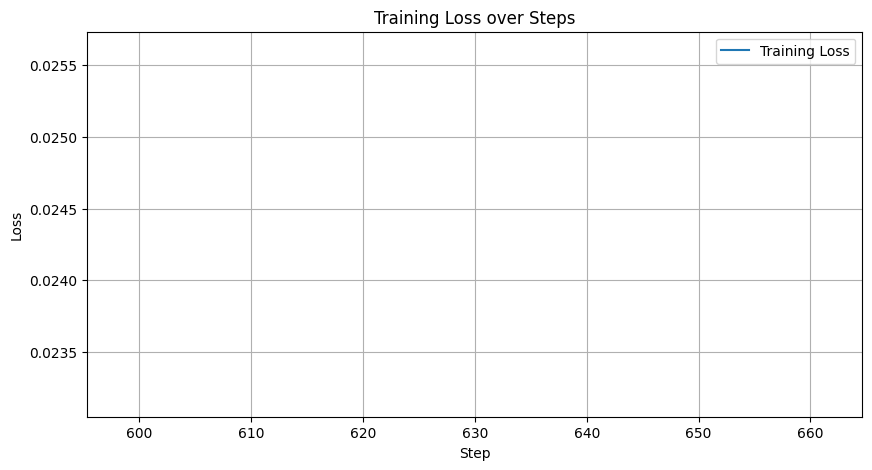

In [30]:
# import matplotlib.pyplot as plt
# log_history = trainer.state.log_history
# df = pd.DataFrame(log_history)
# print(df)
# # Filter baris yang memiliki nilai train_loss yang valid
train_loss_df = df
train_loss_df
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_df['step'], train_loss_df['train_loss'], label='Training Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss over Steps')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from argparse import ArgumentParser
import os
from datasets import Dataset
import utils
import preprocess
import postprocess
import pandas as pd
import json
import random
import torch
from copy import deepcopy
from transformers import (Trainer, TrainingArguments,
                          Seq2SeqTrainer ,Seq2SeqTrainingArguments,
                          DataCollatorForLanguageModeling, DataCollatorForSeq2Seq,
                          AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM)


data_reader = preprocess.read.DataReader()
data_augmentator = preprocess.augmentation.DataAugmentator()
cleaner = postprocess.clean.Cleaner()
answer_catcher = postprocess.ans_catcher.AnswerCatcher()

def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config_indo.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config2.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args_88.json")
    parser.add_argument("--test_config", type=str, help="Path to test data configuration json file.", default="configs/test_config.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="rdyzakya/IndoLEGO-ABSA")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

def set_env(args):
    # Environment
    utils.set_seed(args.seed)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.n_gpu

def get_data(absa_config, non_absa_config, prompt, answer, shuffle):
    ds = []
    for config in absa_config:
        path = config.pop("path")
        data = data_reader.do(path)

        augmentation_args = deepcopy(config)
        for i in range(len(augmentation_args["tasks"])):
            augmentation_args["tasks"][i] = {
                "se_order" : augmentation_args["tasks"][i],
                "prompt" : prompt,
                "answer" : answer
            }
        augmentation_args.update({
            "data" : data
        })

        augmented_data = data_augmentator.do(**augmentation_args)
        ds.extend(augmented_data)

    if non_absa_config != None:
        for path in non_absa_config:
            df = pd.read_csv(path)
            df["se_order"] = "non_absa"
            data = df.to_dict(orient="records")
            ds.extend(data)

    if shuffle:
        random.shuffle(ds)

    ds = Dataset.from_list(ds)

    return ds

def main():
    print("epoch : 2, learning_rate: 0.0001")
    args = init_args()

    # Set environment
    set_env(args)

    # Training data
    ## ABSA Dataset
    with open(args.td_config, 'r') as fp:
        td_config = json.load(fp)

    ## Non ABSA Dataset
    na_config = None
    if args.na_config:
        with open(args.na_config, 'r') as fp:
            na_config = json.load(fp)

    train = get_data(td_config, na_config,
                     prompt=args.prompt, answer=args.answer,
                     shuffle=args.shuffle_train)
    train.to_csv("01/train.csv")

    # Validation data
    do_eval = bool(args.vd_config)
    val = None
    if do_eval:
        with open(args.vd_config, 'r') as fp:
            vd_config = json.load(fp)
        val = get_data(vd_config, None,
                       prompt=args.prompt, answer=args.answer,
                       shuffle=False)
        val.to_csv("01/val.csv")
        
        with open(args.test_config, 'r') as fp:
            test_config = json.load(fp)
        test = get_data(test_config, None,
                       prompt=args.prompt, answer=args.answer,
                       shuffle=False)
        val.to_csv("01/test.csv")

        
    # Prepare tokenizer and answer utilities
    with open(args.train_args, 'r') as fp:
        train_args = json.load(fp)
    output_dir = train_args["output_dir"]

    tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)
    
    # Encoding functions
    encode_seq2seq = lambda x: tokenizer(x["input"], text_target=x["output"],
                                         max_length=args.max_len, padding=True, truncation=True,
                                         return_tensors="pt")

    catch_answer_fn = getattr(answer_catcher, args.answer)

    def catch_answer_seq2seq(out, se_order, text):
        out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
        return catch_answer_fn(out, se_order, text)

    decoding_args = {
        "skip_special_tokens": True  # Adjust based on how tokens are handled by your model
    }

    # Prepare model and training utilities
    try:
        model = AutoModelForSeq2SeqLM.from_pretrained(args.model_name_or_path)
        train_tok = train.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
        val_tok = None
        data_collator = DataCollatorForSeq2Seq(tokenizer)
        train_args = Seq2SeqTrainingArguments(**train_args)
        trainer_args = dict(model=model,
                            args=train_args,
                            tokenizer=tokenizer,
                            data_collator=data_collator,
                            train_dataset=train_tok)
        
        if do_eval:
            val_tok = val.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
            trainer_args.update(dict(eval_dataset=val_tok,
                                     compute_metrics=lambda x: utils.compute_metrics(catch_answer_seq2seq, x, decoding_args, tokenizer, val["se_order"]),
                                     preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
        
        trainer = Seq2SeqTrainer(**trainer_args)

    except ValueError as ve:
        raise NotImplementedError("Only Seq2Seq and CausalLM Model")

    # Training
    trainer.train()

    # Save
    if trainer.is_world_process_zero():
        tokenizer.save_pretrained(save_directory=output_dir)
        model.save_pretrained(save_directory=output_dir)
    # Setelah training selesai


if __name__ == "__main__":
    main()


epoch : 2, learning_rate: 0.0001



100%|██████████| 2070/2070 [00:00<00:00, 15124.03it/s]


Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]


100%|██████████| 520/520 [00:00<00:00, 40617.50it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]


100%|██████████| 105/105 [00:00<00:00, 53714.10it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Map:   0%|          | 0/2003 [00:00<?, ? examples/s]

Map:   0%|          | 0/518 [00:00<?, ? examples/s]

INPUTS >> alhamdulillah semuanya sudah baik.| aspek : <extra_id_0>
TARGETS >> <extra_id_0> NULL
PREDS >> <extra_id_0> semuanya


In [ ]:
log_history = trainer.state.log_history
df = pd.DataFrame(log_history)

# Plot training loss
# plt.figure(figsize=(10, 5))
# plt.plot(df['step'], df['loss'], label='Training Loss')
# plt.xlabel('Step')
# plt.ylabel('Loss')
# plt.title('Training Loss over Steps')
# plt.legend()
# plt.grid(True)
# plt.show()

In [102]:
from argparse import ArgumentParser
import os
from datasets import Dataset
import utils
import preprocess
import postprocess
import pandas as pd
import json
import random
from copy import deepcopy
from transformers import (Trainer, TrainingArguments,
                          Seq2SeqTrainer ,Seq2SeqTrainingArguments,
                          DataCollatorForLanguageModeling, DataCollatorForSeq2Seq,
                          AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM)


data_reader = preprocess.read.DataReader()
data_augmentator = preprocess.augmentation.DataAugmentator()
cleaner = postprocess.clean.Cleaner()
answer_catcher = postprocess.ans_catcher.AnswerCatcher()

def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config_indo.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config2.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args2.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="rdyzakya/IndoLEGO-ABSA")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

def set_env(args):
    # Environment
    utils.set_seed(args.seed)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.n_gpu

def get_data(absa_config, non_absa_config, prompt, answer, shuffle):
    ds = []
    for config in absa_config:
        path = config.pop("path")
        data = data_reader.do(path)

        augmentation_args = deepcopy(config)
        for i in range(len(augmentation_args["tasks"])):
            augmentation_args["tasks"][i] = {
                "se_order" : augmentation_args["tasks"][i],
                "prompt" : prompt,
                "answer" : answer
            }
        augmentation_args.update({
            "data" : data
        })

        augmented_data = data_augmentator.do(**augmentation_args)
        ds.extend(augmented_data)

    if non_absa_config != None:
        for path in non_absa_config:
            df = pd.read_csv(path)
            df["se_order"] = "non_absa"
            data = df.to_dict(orient="records")
            ds.extend(data)

    if shuffle:
        random.shuffle(ds)

    ds = Dataset.from_list(ds)

    return ds

def main():
    print("epoch : 2, learning_rate: 0.0002")
    args = init_args()

    # Set environment
    set_env(args)

    # Training data
    ## ABSA Dataset
    with open(args.td_config, 'r') as fp:
        td_config = json.load(fp)
        # print(td_config)
    ## Non ABSA Dataset
    na_config = None
    if args.na_config != None:
        with open(args.na_config, 'r') as fp:
            na_config = json.load(fp)
            # print(na_config)

    train = get_data(td_config, na_config,
                     prompt=args.prompt, answer=args.answer,
                     shuffle=args.shuffle_train)
    train.to_csv("02/train.csv")
    # print(train)
    # Validation data
    do_eval = bool(args.vd_config)
    val = None
    if do_eval:
        with open(args.vd_config, 'r') as fp:
            vd_config = json.load(fp)
        val = get_data(vd_config, None,
                       prompt=args.prompt, answer=args.answer,
                       shuffle=False)
        val.to_csv("02/val.csv")

    # Prepare tokenizer and answer utilities
    with open(args.train_args, 'r') as fp:
        train_args = json.load(fp)
    output_dir = train_args["output_dir"]

    tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)
    encode_seq2seq = lambda x: tokenizer(x["input"], text_target=x["output"],
                                    max_length=args.max_len, padding=True, truncation=True,
                                    return_tensors="pt")
    encode_clm = lambda x: tokenizer([el["input"] + ' ' + tokenizer.sep_token + ' ' + el["output"] + ' ' + tokenizer.eos_token
                                      for el in x],
                                    max_length=args.max_len, padding=True, truncation=True,
                                    return_tensors="pt")

    catch_answer_fn = getattr(answer_catcher, args.answer)

    def catch_answer_seq2seq(out, se_order, text):
        out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
        return catch_answer_fn(out, se_order, text)

    def catch_answer_clm(out, se_order, text):
        out = out.split(tokenizer.sep_token)[-1]
        out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
        return catch_answer_fn(out, se_order, text)

    decoding_args = {
        "skip_special_tokens" : False
    }

    # Prepare model and training utilities
    try:
        model = AutoModelForSeq2SeqLM.from_pretrained(args.model_name_or_path)
        train_tok = train.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
        val_tok = None
        data_collator = DataCollatorForSeq2Seq(tokenizer)
        train_args = Seq2SeqTrainingArguments(**train_args)
        trainer_args = dict(model=model,
                            args=train_args,
                            tokenizer=tokenizer,
                            data_collator=data_collator,
                            train_dataset=train_tok,)
        if do_eval:
            val_tok = val.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
            trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_seq2seq, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
        trainer = Seq2SeqTrainer(**trainer_args)
    except ValueError as ve:
        try:
            model = AutoModelForCausalLM.from_pretrained(args.model_name_or_path)
            utils.add_token_clm(model, tokenizer)
            train_tok = train.map(encode_clm, batched=True, remove_columns=train.column_names)
            val_tok = None
            data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False)
            train_args = TrainingArguments(**train_args)
            trainer_args = dict(model=model,
                            args=train_args,
                            tokenizer=tokenizer,
                            data_collator=data_collator,
                            train_dataset=train_tok,)
            if do_eval:
                val_tok = val.map(encode_clm, batched=True, remove_columns=train.column_names)
                trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_clm, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
            trainer = Trainer(**trainer_args)
        except ValueError as ve:
            raise NotImplementedError("Only Seq2Seq and CausalLM Model")

    # Training
    trainer.train()

    # Save
    if trainer.is_world_process_zero():
        tokenizer.save_pretrained(save_directory=output_dir)
        model.save_pretrained(save_directory=output_dir)
if __name__ == "__main__":
    main()


epoch : 2, learning_rate: 0.0002



100%|██████████| 2070/2070 [00:00<00:00, 17442.32it/s]


Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]


100%|██████████| 520/520 [00:00<00:00, 40280.69it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Map:   0%|          | 0/2003 [00:00<?, ? examples/s]

Map:   0%|          | 0/518 [00:00<?, ? examples/s]

INPUTS >> alhamdulillah semuanya sudah baik.| aspek : <extra_id_0></s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
TARGETS >> <extra_id_0> NULL</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
PREDS >> <extra_id_0> semuanya</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><p

There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight'].


In [105]:
from argparse import ArgumentParser
import os
from datasets import Dataset
import utils
import preprocess
import postprocess
import pandas as pd
import json
import random
from copy import deepcopy
from transformers import (Trainer, TrainingArguments,
                          Seq2SeqTrainer ,Seq2SeqTrainingArguments,
                          DataCollatorForLanguageModeling, DataCollatorForSeq2Seq,
                          AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM)


data_reader = preprocess.read.DataReader()
data_augmentator = preprocess.augmentation.DataAugmentator()
cleaner = postprocess.clean.Cleaner()
answer_catcher = postprocess.ans_catcher.AnswerCatcher()

def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config_indo.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config2.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args3.json")
    parser.add_argument("--test_config", type=str, help="Path to test data configuration json file.", required=False)
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="rdyzakya/IndoLEGO-ABSA")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

def set_env(args):
    # Environment
    utils.set_seed(args.seed)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.n_gpu

def get_data(absa_config, non_absa_config, prompt, answer, shuffle):
    ds = []
    for config in absa_config:
        path = config.pop("path")
        data = data_reader.do(path)

        augmentation_args = deepcopy(config)
        for i in range(len(augmentation_args["tasks"])):
            augmentation_args["tasks"][i] = {
                "se_order" : augmentation_args["tasks"][i],
                "prompt" : prompt,
                "answer" : answer
            }
        augmentation_args.update({
            "data" : data
        })

        augmented_data = data_augmentator.do(**augmentation_args)
        ds.extend(augmented_data)

    if non_absa_config != None:
        for path in non_absa_config:
            df = pd.read_csv(path)
            df["se_order"] = "non_absa"
            data = df.to_dict(orient="records")
            ds.extend(data)

    if shuffle:
        random.shuffle(ds)

    ds = Dataset.from_list(ds)

    return ds

def main():
    print("epoch : 2, learning_rate: 0.0003")
    args = init_args()

    # Set environment
    set_env(args)

    # Training data
    ## ABSA Dataset
    with open(args.td_config, 'r') as fp:
        td_config = json.load(fp)
        # print(td_config)
    ## Non ABSA Dataset
    na_config = None
    if args.na_config != None:
        with open(args.na_config, 'r') as fp:
            na_config = json.load(fp)
            # print(na_config)

    train = get_data(td_config, na_config,
                     prompt=args.prompt, answer=args.answer,
                     shuffle=args.shuffle_train)
    train.to_csv("03/train.csv")
    # print(train)
    # Validation data
    do_eval = bool(args.vd_config)
    val = None
    if do_eval:
        with open(args.vd_config, 'r') as fp:
            vd_config = json.load(fp)
        val = get_data(vd_config, None,
                       prompt=args.prompt, answer=args.answer,
                       shuffle=False)
        val.to_csv("03/val.csv")

    # Prepare tokenizer and answer utilities
    with open(args.train_args, 'r') as fp:
        train_args = json.load(fp)
    output_dir = train_args["output_dir"]

    tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)
    encode_seq2seq = lambda x: tokenizer(x["input"], text_target=x["output"],
                                    max_length=args.max_len, padding=True, truncation=True,
                                    return_tensors="pt")
    encode_clm = lambda x: tokenizer([el["input"] + ' ' + tokenizer.sep_token + ' ' + el["output"] + ' ' + tokenizer.eos_token
                                      for el in x],
                                    max_length=args.max_len, padding=True, truncation=True,
                                    return_tensors="pt")

    catch_answer_fn = getattr(answer_catcher, args.answer)

    def catch_answer_seq2seq(out, se_order, text):
        out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
        return catch_answer_fn(out, se_order, text)

    def catch_answer_clm(out, se_order, text):
        out = out.split(tokenizer.sep_token)[-1]
        out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
        return catch_answer_fn(out, se_order, text)

    decoding_args = {
        "skip_special_tokens" : False
    }

    # Prepare model and training utilities
    try:
        model = AutoModelForSeq2SeqLM.from_pretrained(args.model_name_or_path)
        train_tok = train.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
        val_tok = None
        data_collator = DataCollatorForSeq2Seq(tokenizer)
        train_args = Seq2SeqTrainingArguments(**train_args)
        trainer_args = dict(model=model,
                            args=train_args,
                            tokenizer=tokenizer,
                            data_collator=data_collator,
                            train_dataset=train_tok,)
        if do_eval:
            val_tok = val.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
            trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_seq2seq, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
        trainer = Seq2SeqTrainer(**trainer_args)
    except ValueError as ve:
        try:
            model = AutoModelForCausalLM.from_pretrained(args.model_name_or_path)
            utils.add_token_clm(model, tokenizer)
            train_tok = train.map(encode_clm, batched=True, remove_columns=train.column_names)
            val_tok = None
            data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False)
            train_args = TrainingArguments(**train_args)
            trainer_args = dict(model=model,
                            args=train_args,
                            tokenizer=tokenizer,
                            data_collator=data_collator,
                            train_dataset=train_tok,)
            if do_eval:
                val_tok = val.map(encode_clm, batched=True, remove_columns=train.column_names)
                trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_clm, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
            trainer = Trainer(**trainer_args)
        except ValueError as ve:
            raise NotImplementedError("Only Seq2Seq and CausalLM Model")

    # Training
    trainer.train()

    # Save
    if trainer.is_world_process_zero():
        tokenizer.save_pretrained(save_directory=output_dir)
        model.save_pretrained(save_directory=output_dir)


if __name__ == "__main__":
    main()


epoch : 2, learning_rate: 0.0003



100%|██████████| 2070/2070 [00:00<00:00, 13549.04it/s]


Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]


100%|██████████| 520/520 [00:00<00:00, 39813.77it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Map:   0%|          | 0/2003 [00:00<?, ? examples/s]

Map:   0%|          | 0/518 [00:00<?, ? examples/s]

INPUTS >> alhamdulillah semuanya sudah baik.| aspek : <extra_id_0></s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
TARGETS >> <extra_id_0> NULL</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
PREDS >> <extra_id_0> semuanya</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><p

There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight'].


In [72]:
model = AutoModelForSeq2SeqLM.from_pretrained("./output/GAS-Indo-o")

In [83]:
def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config_indo.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config2.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args.json")
    parser.add_argument("--test_config", type=str, help="Path to test data configuration json file.", default="configs/test_config.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="rdyzakya/IndoLEGO-ABSA")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args
args = init_args()
with open(args.vd_config, 'r') as fp:
    vd_config = json.load(fp)
val = get_data(vd_config, None,
               prompt=args.prompt, answer=args.answer,
               shuffle=False)
val.to_csv("01/val.csv")

with open(args.test_config, 'r') as fp:
    test_config = json.load(fp)
test = get_data(test_config, None,
               prompt=args.prompt, answer=args.answer,
               shuffle=False)
test.to_csv("01/test.csv")


100%|██████████| 520/520 [00:00<00:00, 37043.35it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]


100%|██████████| 105/105 [00:00<00:00, 53092.46it/s]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

13295

In [101]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from argparse import ArgumentParser

def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config_indo.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config2.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args.json")
    parser.add_argument("--test_config", type=str, help="Path to test data configuration json file.", default="configs/test_config.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="output/GAS-Indo-o")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

# Inisialisasi argumen
args = init_args()

# Inisialisasi tokenizer dan model
tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)
model = AutoModelForSeq2SeqLM.from_pretrained(args.model_name_or_path)
print("Model dan tokenizer loaded")

# Baca data uji dari CSV
test_data = pd.read_csv("01/test.csv")

# Ambil teks dari kolom 'input' sebagai daftar string
test_texts = test_data['input'].tolist()
print("Data loaded")
print(test_texts)

try:
    # Tokenisasi input teks
    inputs = tokenizer(test_texts, return_tensors="pt", padding=True, truncation=True, max_length=args.max_len)
    print("Tokenization successful")

    # Generate output
    outputs = model.generate(inputs["input_ids"], max_length=50)
    print("Prediction successful")

    # Decode output tokens back to text
    output_texts = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    # Tambahkan kolom 'output' ke dalam DataFrame
    test_data['output'] = output_texts

    # Simpan DataFrame ke dalam file CSV
    test_data.to_csv("01/test_with_predictions.csv", index=False)

    print("Predictions saved to '01/test_with_predictions.csv'")

except Exception as e:
    print("Error during prediction:", e)


Model dan tokenizer loaded
Data loaded
['bagus sekali .| opini : <extra_id_0>', 'baik dan mampu memberikan contoh yang dapat di pahami .| aspek : <extra_id_0> ,opini : <extra_id_1> ,sentimen : <extra_id_2>', 'baik dan tegas .| aspek : <extra_id_0> ,sentimen : <extra_id_1>', 'baik , tetap semangat .| aspek : <extra_id_0> ,opini : <extra_id_1> ,sentimen : <extra_id_2>', 'bagus , dan dapat di pahami materinya .| aspek : <extra_id_0>', 'bagus cara mengajar nya .| aspek : <extra_id_0> ,opini : <extra_id_1>', 'aku suka cara ngajarnya .| aspek : <extra_id_0> ,sentimen : <extra_id_1>', 'bagus cara mengajar nya .| aspek : <extra_id_0>', 'bagus dalam mengajar , memberi contoh yang baik .| aspek : <extra_id_0> ,opini : <extra_id_1>', 'baik , bagus mengajarnya , tepat waktu .| aspek : <extra_id_0>', 'baik makasih pak indi atas ilmunya .| opini : <extra_id_0>', 'bagus dalam mengajar , memberi contoh yang baik .| aspek : <extra_id_0> ,sentimen : <extra_id_1>', 'asik dalam mengajar , dan selalu sabar

In [86]:
test_data = pd.read_csv("01/test.csv")

# Ambil teks dari kolom 'text' sebagai daftar string
test_texts = test_data['input'].tolist()

# Inisialisasi tokenizer
tokenizer = AutoTokenizer.from_pretrained("./output/GAS-Indo-o")

# Tokenisasi input teks
inputs = tokenizer(test_texts, return_tensors="pt", padding=True, truncation=True, max_length=128)

# Contoh penggunaan tokenizer
print(inputs)

{'input_ids': tensor([[30536, 10552,   259,  ...,     0,     0,     0],
        [ 5338,   469,   259,  ...,     0,     0,     0],
        [ 5338,   469, 19413,  ...,     0,     0,     0],
        ...,
        [  259,   262, 15008,  ...,     0,     0,     0],
        [ 5338,   259,   260,  ...,     0,     0,     0],
        [30536, 10552,   259,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


#Sisihkan

In [ ]:
from argparse import ArgumentParser
import os
from datasets import Dataset
import utils
import preprocess
import postprocess
import pandas as pd
import json
import random
from copy import deepcopy
from transformers import (Trainer, TrainingArguments,
                          Seq2SeqTrainer ,Seq2SeqTrainingArguments,
                          DataCollatorForLanguageModeling, DataCollatorForSeq2Seq,
                          AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM)


data_reader = preprocess.read.DataReader()
data_augmentator = preprocess.augmentation.DataAugmentator()
cleaner = postprocess.clean.Cleaner()
answer_catcher = postprocess.ans_catcher.AnswerCatcher()

def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="google/mt5-base")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

def set_env(args):
    # Environment
    utils.set_seed(args.seed)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.n_gpu

def get_data(absa_config, non_absa_config, prompt, answer, shuffle):
    ds = []
    for config in absa_config:
        path = config.pop("path")
        data = data_reader.do(path)

        augmentation_args = deepcopy(config)
        for i in range(len(augmentation_args["tasks"])):
            augmentation_args["tasks"][i] = {
                "se_order" : augmentation_args["tasks"][i],
                "prompt" : prompt,
                "answer" : answer
            }
        augmentation_args.update({
            "data" : data
        })

        augmented_data = data_augmentator.do(**augmentation_args)
        ds.extend(augmented_data)

    if non_absa_config != None:
        for path in non_absa_config:
            df = pd.read_csv(path)
            df["se_order"] = "non_absa"
            data = df.to_dict(orient="records")
            ds.extend(data)

    if shuffle:
        random.shuffle(ds)

    ds = Dataset.from_list(ds)

    return ds

def main():
    args = init_args()

    # Set environment
    set_env(args)

    # Training data
    ## ABSA Dataset
    with open(args.td_config, 'r') as fp:
        td_config = json.load(fp)
        # print(td_config)
    ## Non ABSA Dataset
    na_config = None
    if args.na_config != None:
        with open(args.na_config, 'r') as fp:
            na_config = json.load(fp)
    # print(na_config)

    train = get_data(td_config, na_config,
                     prompt=args.prompt, answer=args.answer,
                     shuffle=args.shuffle_train)
    train.to_csv("train.csv")
    # print(train)
    # Validation data
    do_eval = bool(args.vd_config)
    val = None
    if do_eval:
        with open(args.vd_config, 'r') as fp:
            vd_config = json.load(fp)
        val = get_data(vd_config, None,
                       prompt=args.prompt, answer=args.answer,
                       shuffle=False)
        val.to_csv("val.csv")

    # Prepare tokenizer and answer utilities
    with open(args.train_args, 'r') as fp:
        train_args = json.load(fp)
    output_dir = train_args["output_dir"]

    tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)
    encode_seq2seq = lambda x: tokenizer(x["input"], text_target=x["output"],
                                    max_length=args.max_len, padding=True, truncation=True,
                                    return_tensors="pt")
    encode_clm = lambda x: tokenizer([el["input"] + ' ' + tokenizer.sep_token + ' ' + el["output"] + ' ' + tokenizer.eos_token
                                      for el in x],
                                    max_length=args.max_len, padding=True, truncation=True,
                                    return_tensors="pt")

    catch_answer_fn = getattr(answer_catcher, args.answer)

    def catch_answer_seq2seq(out, se_order, text):
        out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
        return catch_answer_fn(out, se_order, text)

    def catch_answer_clm(out, se_order, text):
        out = out.split(tokenizer.sep_token)[-1]
        out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
        return catch_answer_fn(out, se_order, text)

    decoding_args = {
        "skip_special_tokens" : False
    }

    # Prepare model and training utilities
    try:
        model = AutoModelForSeq2SeqLM.from_pretrained(args.model_name_or_path)
        print("AutoModelForSeq2SeqLM Digunakan")
        train_tok = train.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
        val_tok = None
        data_collator = DataCollatorForSeq2Seq(tokenizer)
        train_args = Seq2SeqTrainingArguments(**train_args)
        trainer_args = dict(model=model,
                            args=train_args,
                            tokenizer=tokenizer,
                            data_collator=data_collator,
                            train_dataset=train_tok,)
        if do_eval:
            val_tok = val.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
            trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_seq2seq, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
        trainer = Seq2SeqTrainer(**trainer_args)
    except ValueError as ve:
        try:
            model = AutoModelForCausalLM.from_pretrained(args.model_name_or_path)
            print("AutoModelForCausalLM Digunakan")
            utils.add_token_clm(model, tokenizer)
            train_tok = train.map(encode_clm, batched=True, remove_columns=train.column_names)
            val_tok = None
            data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False)
            train_args = TrainingArguments(**train_args)
            trainer_args = dict(model=model,
                            args=train_args,
                            tokenizer=tokenizer,
                            data_collator=data_collator,
                            train_dataset=train_tok,)
            if do_eval:
                val_tok = val.map(encode_clm, batched=True, remove_columns=train.column_names)
                trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_clm, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
            trainer = Trainer(**trainer_args)
        except ValueError as ve:
            raise NotImplementedError("Only Seq2Seq and CausalLM Model")

    # Training
    trainer.train()

    # Save
    if trainer.is_world_process_zero():
        tokenizer.save_pretrained(save_directory=output_dir)
        model.save_pretrained(save_directory=output_dir)

if __name__ == "__main__":
    main()

100%|██████████| 4285/4285 [00:01<00:00, 2591.42it/s]


Creating CSV from Arrow format:   0%|          | 0/57 [00:00<?, ?ba/s]

100%|██████████| 1050/1050 [00:00<00:00, 6716.08it/s]


Creating CSV from Arrow format:   0%|          | 0/14 [00:00<?, ?ba/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/pyth

AutoModelForSeq2SeqLM Digunakan


Map:   0%|          | 0/56207 [00:00<?, ? examples/s]

Map:   0%|          | 0/13295 [00:00<?, ? examples/s]

In [ ]:
pip install tensorboard

In [ ]:
import tensorflow as tf
import datetime

In [ ]:
log_dir = "output/GAS-Indo-o/runs/Jun01_09-43-48_93788a03ba60/events.out.tfevents.1717235031.93788a03ba60.1209.0" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_val, y_val),
    callbacks=[tensorboard_callback]
)


In [ ]:
from transformers import MT5ForConditionalGeneration, MT5Tokenizer

# Memuat model dan tokenizer
model_name = 'google/mt5-base'
model = MT5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = MT5Tokenizer.from_pretrained(model_name)

# Verifikasi konfigurasi model
print(model.config)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/376 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


MT5Config {
  "_name_or_path": "google/mt5-base",
  "architectures": [
    "MT5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 2048,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "gelu_new",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "gated-gelu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "mt5",
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "tie_word_embeddings": false,
  "tokenizer_class": "T5Tokenizer",
  "transformers_version": "4.41.2",
  "use_cache": true,
  "vocab_size": 250112
}



In [ ]:
from argparse import ArgumentParser
import os
from datasets import Dataset
import utils
import preprocess
import postprocess
import pandas as pd
import json
import random
from copy import deepcopy
from transformers import (Trainer, TrainingArguments,
                          Seq2SeqTrainer ,Seq2SeqTrainingArguments,
                          DataCollatorForLanguageModeling, DataCollatorForSeq2Seq,
                          AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM)


data_reader = preprocess.read.DataReader()
data_augmentator = preprocess.augmentation.DataAugmentator()
cleaner = postprocess.clean.Cleaner()
answer_catcher = postprocess.ans_catcher.AnswerCatcher()

def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="google/mt5-base")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

def set_env(args):
    # Environment
    utils.set_seed(args.seed)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.n_gpu

def get_data(absa_config, non_absa_config, prompt, answer, shuffle):
    ds = []
    for config in absa_config:
        path = config.pop("path")
        data = data_reader.do(path)

        augmentation_args = deepcopy(config)
        for i in range(len(augmentation_args["tasks"])):
            augmentation_args["tasks"][i] = {
                "se_order" : augmentation_args["tasks"][i],
                "prompt" : prompt,
                "answer" : answer
            }
        augmentation_args.update({
            "data" : data
        })

        augmented_data = data_augmentator.do(**augmentation_args)
        ds.extend(augmented_data)

    if non_absa_config != None:
        for path in non_absa_config:
            df = pd.read_csv(path)
            df["se_order"] = "non_absa"
            data = df.to_dict(orient="records")
            ds.extend(data)

    if shuffle:
        random.shuffle(ds)

    ds = Dataset.from_list(ds)

    return ds

def main():
    args = init_args()

    # Set environment
    set_env(args)

    # Training data
    ## ABSA Dataset
    with open(args.td_config, 'r') as fp:
        td_config = json.load(fp)
        # print(td_config)
    ## Non ABSA Dataset
    na_config = None
    if args.na_config != None:
        with open(args.na_config, 'r') as fp:
            na_config = json.load(fp)
            # print(na_config)

    train = get_data(td_config, na_config,
                     prompt=args.prompt, answer=args.answer,
                     shuffle=args.shuffle_train)
    train.to_csv("train.csv")
    # print(train)
    # Validation data
    do_eval = bool(args.vd_config)
    val = None
    if do_eval:
        with open(args.vd_config, 'r') as fp:
            vd_config = json.load(fp)
        val = get_data(vd_config, None,
                       prompt=args.prompt, answer=args.answer,
                       shuffle=False)
        val.to_csv("val.csv")

    # Prepare tokenizer and answer utilities
    with open(args.train_args, 'r') as fp:
        train_args = json.load(fp)
    output_dir = train_args["output_dir"]

    tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)
    encode_seq2seq = lambda x: tokenizer(x["input"], text_target=x["output"],
                                    max_length=args.max_len, padding=True, truncation=True,
                                    return_tensors="pt")
    encode_clm = lambda x: tokenizer([el["input"] + ' ' + tokenizer.sep_token + ' ' + el["output"] + ' ' + tokenizer.eos_token
                                      for el in x],
                                    max_length=args.max_len, padding=True, truncation=True,
                                    return_tensors="pt")

    catch_answer_fn = getattr(answer_catcher, args.answer)

    def catch_answer_seq2seq(out, se_order, text):
        out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
        return catch_answer_fn(out, se_order, text)

    def catch_answer_clm(out, se_order, text):
        out = out.split(tokenizer.sep_token)[-1]
        out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
        return catch_answer_fn(out, se_order, text)

    decoding_args = {
        "skip_special_tokens" : False
    }

    # Prepare model and training utilities
    try:
        model = AutoModelForSeq2SeqLM.from_pretrained(args.model_name_or_path)
        train_tok = train.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
        val_tok = None
        data_collator = DataCollatorForSeq2Seq(tokenizer)
        train_args = Seq2SeqTrainingArguments(**train_args)
        trainer_args = dict(model=model,
                            args=train_args,
                            tokenizer=tokenizer,
                            data_collator=data_collator,
                            train_dataset=train_tok,)
        if do_eval:
            val_tok = val.map(encode_seq2seq, batched=True, remove_columns=train.column_names)
            trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_seq2seq, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
        trainer = Seq2SeqTrainer(**trainer_args)
    except ValueError as ve:
        try:
            model = AutoModelForCausalLM.from_pretrained(args.model_name_or_path)
            utils.add_token_clm(model, tokenizer)
            train_tok = train.map(encode_clm, batched=True, remove_columns=train.column_names)
            val_tok = None
            data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False)
            train_args = TrainingArguments(**train_args)
            trainer_args = dict(model=model,
                            args=train_args,
                            tokenizer=tokenizer,
                            data_collator=data_collator,
                            train_dataset=train_tok,)
            if do_eval:
                val_tok = val.map(encode_clm, batched=True, remove_columns=train.column_names)
                trainer_args.update(dict(eval_dataset=val_tok,
                                 compute_metrics=lambda x: utils.compute_metrics(catch_answer_clm, x, decoding_args, tokenizer, val["se_order"]),
                                 preprocess_logits_for_metrics=utils.preprocess_logits_for_metrics))
            trainer = Trainer(**trainer_args)
        except ValueError as ve:
            raise NotImplementedError("Only Seq2Seq and CausalLM Model")

    # Training
    trainer.train()

    # Save
    if trainer.is_world_process_zero():
        tokenizer.save_pretrained(save_directory=output_dir)
        model.save_pretrained(save_directory=output_dir)

if __name__ == "__main__":
    main()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 939, in _find_spec
AttributeError: '_OpenCVImportHook' object has no attribute 'find_spec'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-85331bae16f2>", line 11, in <cell line: 11>
    from transformers import (Trainer, TrainingArguments,
  File "<frozen importlib._bootstrap>", line 1075, in _handle_fromlist
  File "/usr/local/lib/python3.10/dist-packages/transformers/utils/import_utils.py", line 1525, in __getattr__
    module = self._get_module(self._class_to_module[name])
  File "/usr/local/lib/python3.10/dist-packages/transformers/utils/import_utils.py", line 1535, in _get_module
    return importlib.import_module("." + module_name, self.__name__)
  File "/usr/lib

TypeError: object of type 'NoneType' has no len()

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from argparse import ArgumentParser
import os
from datasets import Dataset
import utils
import preprocess
import postprocess
import pandas as pd
import json
import random
from copy import deepcopy
from transformers import (Trainer, TrainingArguments,
                          Seq2SeqTrainer ,Seq2SeqTrainingArguments,
                          DataCollatorForLanguageModeling, DataCollatorForSeq2Seq,
                          AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM)


data_reader = preprocess.read.DataReader()
data_augmentator = preprocess.augmentation.DataAugmentator()
cleaner = postprocess.clean.Cleaner()
answer_catcher = postprocess.ans_catcher.AnswerCatcher()
def init_args():
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", default="configs/vd_config.json")
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="google/mt5-base")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

def set_env(args):
    # Environment
    utils.set_seed(args.seed)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.n_gpu

def main():
    args = init_args()

    # Set environment
    set_env(args)
    with open(args.train_args, 'r') as fp:
          train_args = json.load(fp)
    output_dir = train_args["output_dir"]
    def catch_answer_seq2seq(out, se_order, text):
        out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
        return catch_answer_fn(out, se_order, text)

    def catch_answer_clm(out, se_order, text):
        out = out.split(tokenizer.sep_token)[-1]
        out = cleaner.one(out, remove=[tokenizer.eos_token, tokenizer.pad_token] + args.remove)
        return catch_answer_fn(out, se_order, text)

    decoding_args = {
        "skip_special_tokens" : False
    }

    model = AutoModelForSequenceClassification.from_pretrained(save_directory=output_dir)
    tokenizer = AutoTokenizer.from_pretrained(save_directory=output_dir)

if __name__ == "__main__":
    main()


TypeError: _BaseAutoModelClass.from_pretrained() missing 1 required positional argument: 'pretrained_model_name_or_path'

#trailn error

In [ ]:
ls

args.json  constant.py  evaluation/  postprocess/  __pycache__/  utils.py
configs/   data/        output/      preprocess/   train.csv     val.csv


In [ ]:
import evaluation
from evaluation import metrics

# from metrics import *
metrics.peqi()

AttributeError: module 'evaluation.metrics' has no attribute 'peqi'

In [ ]:
args = init_args()

# Set environment
set_env(args)

# Training data
## ABSA Dataset
with open(args.td_config, 'r') as fp:
    td_config = json.load(fp)
    # print(td_config)
## Non ABSA Dataset
na_config = None
if args.na_config != None:
    with open(args.na_config, 'r') as fp:
        na_config = json.load(fp)
        # print(na_config)

train = get_data(td_config, na_config,
                  prompt=args.prompt, answer=args.answer,
                  shuffle=args.shuffle_train)
train.to_csv("train.csv")
# print(train)
# Validation data
do_eval = bool(args.vd_config)
val = None
if do_eval:
    with open(args.vd_config, 'r') as fp:
        vd_config = json.load(fp)
    val = get_data(vd_config, None,
                    prompt=args.prompt, answer=args.answer,
                    shuffle=False)
    val.to_csv("val.csv")

# Prepare tokenizer and answer utilities
with open(args.train_args, 'r') as fp:
    train_args = json.load(fp)
output_dir = train_args["output_dir"]
# print(output_dir)

NameError: name 'init_args' is not defined

In [ ]:
train_args[0]["output_dir"]

KeyError: 'output_dir'

In [ ]:
with open(args.train_args, 'r') as fp:
        train_args = json.load(fp)

        # Debugging: cetak isi train_args
        print("Konten train_args:", train_args)

        # Pastikan train_args adalah list
        if not isinstance(train_args, list):
            raise TypeError("Expected train_args to be a list but got a different type.")

        # Loop melalui setiap elemen dalam list
        for train_arg in train_args:
            # Pastikan setiap elemen adalah dictionary
            if not isinstance(train_arg, dict):
                raise TypeError("Expected elements of train_args to be dictionaries.")

            output_dir = train_arg["path"]  # Misalnya kita ingin mengakses 'path' sebagai 'output_dir'
            print("Output directory:", output_dir)

Konten train_args: [{'path': 'data/absa/id/william/train.txt', 'nt_se_order': 'aos', 'tasks': ['aos', 'ao', 'as', 'a', 'o'], 'n_fold': 5, 'algo': 'round_robin', 'shuffle': True}, {'path': 'data/absa/en/zhang/interim/interim_2/rest15/train.txt', 'nt_se_order': 'acso', 'tasks': ['acos', 'ao', 'as', 'cs', 'a', 'o', 'c'], 'n_fold': 7, 'algo': 'round_robin', 'shuffle': True}, {'path': 'data/absa/en/zhang/interim/interim_2/rest16/train.txt', 'nt_se_order': 'acso', 'tasks': ['acos', 'ao', 'as', 'cs', 'a', 'o', 'c'], 'n_fold': 7, 'algo': 'round_robin', 'shuffle': True}, {'path': 'data/absa/en/wan/interim/rest15/train.txt', 'nt_se_order': 'acs', 'tasks': ['acs', 'as', 'cs', 'a', 'c'], 'n_fold': 5, 'algo': 'round_robin', 'shuffle': True}, {'path': 'data/absa/en/wan/interim/rest16/train.txt', 'nt_se_order': 'acs', 'tasks': ['acs', 'as', 'cs', 'a', 'c'], 'n_fold': 5, 'algo': 'round_robin', 'shuffle': True}, {'path': 'data/absa/en/peng/14lap/train_triplets.txt', 'nt_se_order': 'aos', 'tasks': ['aos

In [ ]:
data_reader = preprocess.read.DataReader()

In [ ]:
import postprocess.clean
import postprocess.ans_catcher
ans_catcher = postprocess.ans_catcher
cleans = postprocess.clean
from typing import List

class Cleaner:
    """
    Responsible to clean the output from the generative ABSA model.
    """
    def one(self, out:str, remove:List[str]=["</s>","<pad>"]) -> str:
        """
        ### DESC
            Method to clean one instance of decomposed answer.
        ### PARAMS
        * out: Decomposed answer.
        * remove: Phrase/word/token that needs to be removed.
        ### RETURN
        * Clean answer.
        """
        result = out
        for tok in remove:
            result = result.replace(tok, '')
        result = result.strip()
        return result

    def many(self, outputs:List[str], remove:List[str]=["</s>","<pad>"]) -> List[str]:
        """
        ### DESC
            Method to clean many instance of decomposed answer.
        ### PARAMS
        * outputs: List of decomposed answer.
        * remove: Phrase/word/token that needs to be removed.
        ### RETURN
        * List of clean answer.
        """
        return [self.one(out=out, remove=remove) for out in outputs]
cleaner = Cleaner()
answer_catcher = ans_catcher.AnswerCatcher()

args.json  constant.py  evaluation/   preprocess/   utils.py
configs/   data/        postprocess/  __pycache__/


In [ ]:
import json
import sys
from argparse import ArgumentParser, Namespace

def init_args() -> Namespace:
    parser = ArgumentParser()
    parser.add_argument("--seed", type=int, help="Training seed", default=42)
    parser.add_argument("--n_gpu", type=str, help="Gpu device(s) used", default='0')
    parser.add_argument("--td_config", type=str, help="Path to train data configuration json file.", default="configs/td_config.json")
    parser.add_argument("--vd_config", type=str, help="Path to validation data configuration json file.", required=False)
    parser.add_argument("--na_config", type=str, help="Path to non absa data configuration json file.", required=False)
    parser.add_argument("--train_args", type=str, help="Path to train configuration json file.", default="configs/train_args.json")
    parser.add_argument("--max_len", type=int, help="Maximum sequence length.", default=128)
    parser.add_argument("--model_name_or_path", type=str, help="Model name or path.", default="google/mt5-base")
    parser.add_argument("--prompt", type=str, help="Prompt type [lego_absa, bartabsa, gas, prefix, one_token, no_prompt].", default="lego_absa")
    parser.add_argument("--answer", type=str, help="Answer type [lego_absa, bartabsa, gas].", default="lego_absa")
    parser.add_argument("--remove", type=str, nargs='+', help="Token/phrase/word needed to be remove, for example id_ID or en_XX in mbart output.", default=[])
    parser.add_argument("--shuffle_train", action="store_true", help="Shuffle overall dataset")

    # Filter out unwanted arguments passed by Jupyter
    args, unknown = parser.parse_known_args()

    return args

args = init_args()

# Open and read the JSON configuration file
with open(args.td_config, 'r') as fp:
    td_config = json.load(fp)
    print(td_config)


[{'path': 'data/absa/id/william/train.txt', 'nt_se_order': 'aos', 'tasks': ['aos', 'ao', 'as', 'a', 'o'], 'n_fold': 5, 'algo': 'round_robin', 'shuffle': True}, {'path': 'data/absa/en/zhang/interim/interim_2/rest15/train.txt', 'nt_se_order': 'acso', 'tasks': ['acos', 'ao', 'as', 'cs', 'a', 'o', 'c'], 'n_fold': 7, 'algo': 'round_robin', 'shuffle': True}, {'path': 'data/absa/en/zhang/interim/interim_2/rest16/train.txt', 'nt_se_order': 'acso', 'tasks': ['acos', 'ao', 'as', 'cs', 'a', 'o', 'c'], 'n_fold': 7, 'algo': 'round_robin', 'shuffle': True}, {'path': 'data/absa/en/wan/interim/rest15/train.txt', 'nt_se_order': 'acs', 'tasks': ['acs', 'as', 'cs', 'a', 'c'], 'n_fold': 5, 'algo': 'round_robin', 'shuffle': True}, {'path': 'data/absa/en/wan/interim/rest16/train.txt', 'nt_se_order': 'acs', 'tasks': ['acs', 'as', 'cs', 'a', 'c'], 'n_fold': 5, 'algo': 'round_robin', 'shuffle': True}, {'path': 'data/absa/en/peng/14lap/train_triplets.txt', 'nt_se_order': 'aos', 'tasks': ['aos', 'ao', 'as', 'a',

In [ ]:
pip show transformers

Name: transformers
Version: 4.41.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 


In [ ]:
from transformers import MT5Config

config = MT5Config.from_pretrained('google/mt5-base')
print(config)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


MT5Config {
  "_name_or_path": "/home/patrick/hugging_face/t5/mt5-base",
  "architectures": [
    "MT5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 2048,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "gelu_new",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "gated-gelu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "mt5",
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "tie_word_embeddings": false,
  "tokenizer_class": "T5Tokenizer",
  "transformers_version": "4.41.2",
  "use_cache": true,
  "vocab_size": 250112
}

